# TUBERCULOSIS TREATMENT EFFECT USING MACHINE LEARNING 

![tuberculosis](tuberculosis.jpg)

## BUILDING A MODEL TO TEST THE EFFECTIVENESS OF TREATMENT ON TUBERCULOSIS

### THE MODEL WILL BE BUILT USING 4 DIFFERENT ALGORITHMS:
### - LOGISTIC REGRESSION
### - K NEAREST NEIGHBOUR
### - SUPPORT VECTOR MACHINE (SVM)
### - RANDOM FOREST 

## Importing  all necessary libraries 

In [1]:
from math import floor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_fscore_support, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

### READING IN THE DATASETS 

In [2]:
specimen_2022 = pd.read_csv('Tuberculosis files/TB_Portals_Specimen_January_2022.csv')
specimen_2023 = pd.read_csv('Tuberculosis files/TB_Portals_Specimen_January_2023.csv')
regimens_2022 = pd.read_csv('Tuberculosis files/TB_Portals_Regimens_January_2022.csv')
regimens_2023 = pd.read_csv('Tuberculosis files/TB_Portals_Regimens_January_2023.csv')
patients_2022 = pd.read_csv('Tuberculosis files/TB_Portals_Patient_Cases_January_2022.csv')
patients_2023 = pd.read_csv('Tuberculosis files/TB_Portals_Patient_Cases_January_2023.csv')
patients_nig = pd.read_csv('Tuberculosis files/TB_Data_Nigeria.csv')

#### Making copies of the datasets

In [3]:
patients_2022_copy = patients_2022.copy()
patients_2023_copy = patients_2023.copy()

specimens_2022_copy = specimen_2022.copy()
specimens_2023_copy = specimen_2022.copy()

regimens_2022_copy = regimens_2022.copy()
regimens_2023_copy = regimens_2023.copy()

patients_nig_copy = patients_nig.copy()

In [4]:
# Checking the info about the 2022 patients data
patients_2022_copy.info()
patients_column_list_2022 = patients_2022.columns.to_list()

# Checking the info about the 2023 patients data
patients_2023_copy.info()
patients_column_list_2023 = patients_2023.columns.to_list()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6596 entries, 0 to 6595
Columns: 204 entries, condition_id to qure_atelectasis
dtypes: float64(6), int64(5), object(193)
memory usage: 10.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8817 entries, 0 to 8816
Columns: 206 entries, condition_id to qure_atelectasis
dtypes: float64(5), int64(6), object(195)
memory usage: 13.9+ MB


#### Selecting useful columns from the patients datasets

In [5]:
patients_column_list_2023

['condition_id',
 'patient_id',
 'identifier',
 'registration_date',
 'age_of_onset',
 'gender',
 'country',
 'education',
 'employment',
 'number_of_children',
 'number_of_daily_contacts',
 'case_definition',
 'diagnosis_code',
 'type_of_resistance',
 'bmi',
 'lung_localization',
 'x_ray_count',
 'status',
 'organization',
 'image_body_site',
 'dissemination',
 'lungcavity_size',
 'anomaly_of_mediastinum_vessels_develop',
 'affect_pleura',
 'shadow_pattern',
 'affect_level',
 'pneumothorax',
 'plevritis',
 'affected_segments',
 'nodicalcinatum',
 'process_prevalence',
 'thromboembolism_of_the_pulmonaryartery',
 'posttbresiduals',
 'lung_capacity_decrease',
 'bronchial_obstruction',
 'anomaly_of_lungdevelop',
 'accumulation_of_contrast',
 'limfoadenopatia',
 'totalcavernum',
 'overall_percent_of_abnormal_volume',
 'pleural_effusion_percent_of_hemithorax_involved',
 'ispleuraleffusionbilateral',
 'other_non_tb_abnormalities',
 'are_mediastinal_lymphnodes_present',
 'rater',
 'collapse',

In [6]:
patients_column_list_2022
patients_column_list_needed = ['patient_id',
 'identifier',
 'registration_date',
 'age_of_onset',
 'gender',
 'country',
 'education',
 'employment',
 'number_of_children',
 'number_of_daily_contacts',
 'case_definition',
 'diagnosis_code',
 'type_of_resistance',
 'bmi',
 'lung_localization',
 'x_ray_count',
 'comorbidity',
 'regimen_count',
 'regimen_drug',
 'status']

patients_2022_new = patients_2022_copy[patients_column_list_needed]

patients_2022_new

,patient_id,identifier,registration_date,age_of_onset,gender,country,education,employment,number_of_children,number_of_daily_contacts,case_definition,diagnosis_code,type_of_resistance,bmi,lung_localization,x_ray_count,comorbidity,regimen_count,regimen_drug,status
0,96f7d990-d005-4ecd-a22d-6d227d86a87d,6207,2020,23,Female,Georgia,Not Reported,Unemployed,NaN,NaN,New,A15.0,Sensitive,NaN,Pulmonary,1,None,1,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",final
1,6affc79d-54c6-463f-b5af-f1f0e66776c6,9152,2019,48,Male,Moldova,"Complete school (a-level, gymnasium)",Unemployed,0.0,1.0,New,A15.1,Sensitive,18.6,Pulmonary,1,None,1,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",final
2,74aae92e-6a8e-437a-affc-a049f5322676,8020,2019,24,Male,Moldova,"Complete school (a-level, gymnasium)",Disabled,0.0,1.0,Failure,A15.0,MDR non XDR,24.5,Pulmonary,1,None,1,"Bedaquiline, Capreomycin, Cycloserine, Linezol...",final
3,6f8bb80f-1bc8-4e2e-bf6e-b4e3bebc662d,7020,2019,37,Male,Ukraine,College (bachelor),Unemployed,NaN,1.0,Failure,A19.8,XDR,22.3,Pulmonary,1,"Diabetes, Hepatitis C, HIV",1,"Amoxicillin-clavulanate, Bedaquiline, Capreomy...",final
4,79bf51ab-76ea-4bab-a3ab-bef40f1b618e,4195,2019,58,Male,Georgia,Not Reported,Unemployed,NaN,NaN,New,A15.0,Sensitive,NaN,Pulmonary,1,None,2,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",final
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6591,00ac6a80-f27f-41c2-8c03-7d86d53d50db,8872,2019,33,Male,Moldova,"Complete school (a-level, gymnasium)",Unemployed,2.0,3.0,New,A15.1,Poly DR,16.2,Pulmonary,1,None,1,"Capreomycin, Ethambutol, Isoniazid, Levofloxac...",final
6592,a32e3d5d-4e08-4461-8082-e850b1f7bdfe,9902,2021,17,Male,Ukraine,Basic school (incl. primary),Unemployed,NaN,NaN,New,A19.8,Sensitive,14.3,Pulmonary,1,None,1,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",final
6593,8fc2ff48-8480-4630-8552-cd34f5b55770,4433,2019,31,Male,Kazakhstan,"Complete school (a-level, gymnasium)",Employed,2.0,3.0,New,A16.0,Mono DR,21.1,Pulmonary,1,"Not specified, Systemically administered gluco...",2,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",final
6594,5d381970-8df7-4fe9-b527-ce4a9d8c5c44,8908,2020,40,Male,Ukraine,"Complete school (a-level, gymnasium)",Unemployed,0.0,1.0,Other,A15.0,Sensitive,19.8,Pulmonary,1,None,1,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",final


#### Doing some necessary mathematics on the columns to cater for the missing values in some rows using the pandas fillna function 

In [7]:
patients_2022_new['number_of_children'] = patients_2022_new['number_of_children'].fillna(patients_2022_new['number_of_children'].sum()/len(patients_2022_new))
patients_2022_new['number_of_daily_contacts'] = patients_2022_new['number_of_daily_contacts'].fillna(patients_2022_new['number_of_daily_contacts'].sum()/len(patients_2022_new))
patients_2022_new['bmi'] = patients_2022_new['bmi'].fillna(patients_2022_new['bmi'].sum()/len(patients_2022_new))

patients_2022_new['number_of_children'] = patients_2022_new['number_of_children'].astype('int')
patients_2022_new['number_of_daily_contacts'] = patients_2022_new['number_of_daily_contacts'].astype('int')
patients_2022_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6596 entries, 0 to 6595
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   patient_id                6596 non-null   object 
 1   identifier                6596 non-null   int64  
 2   registration_date         6596 non-null   int64  
 3   age_of_onset              6596 non-null   int64  
 4   gender                    6596 non-null   object 
 5   country                   6596 non-null   object 
 6   education                 6596 non-null   object 
 7   employment                6596 non-null   object 
 8   number_of_children        6596 non-null   int32  
 9   number_of_daily_contacts  6596 non-null   int32  
 10  case_definition           6596 non-null   object 
 11  diagnosis_code            6596 non-null   object 
 12  type_of_resistance        6596 non-null   object 
 13  bmi                       6596 non-null   float64
 14  lung_loc

C:\Users\oyeni\AppData\Local\Temp\ipykernel_8660\3638707757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patients_2022_new['number_of_children'] = patients_2022_new['number_of_children'].fillna(patients_2022_new['number_of_children'].sum()/len(patients_2022_new))
C:\Users\oyeni\AppData\Local\Temp\ipykernel_8660\3638707757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patients_2022_new['number_of_daily_contacts'] = patients_2022_new['number_of_daily_contacts'].fillna(patients_2022_new['number_of

#### Performing the same processes on the 2023 patients dataset

In [8]:
patients_2023_new = patients_2023_copy[patients_column_list_needed]

patients_2023_new

,patient_id,identifier,registration_date,age_of_onset,gender,country,education,employment,number_of_children,number_of_daily_contacts,case_definition,diagnosis_code,type_of_resistance,bmi,lung_localization,x_ray_count,comorbidity,regimen_count,regimen_drug,status
0,3676197e-6bd7-4c41-8bb0-de5889997b32,8277,2019,40,Male,Georgia,Not Reported,Unemployed,NaN,NaN,New,A15.0,Sensitive,NaN,Pulmonary,1,None,1,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",final
1,96f7d990-d005-4ecd-a22d-6d227d86a87d,6207,2020,23,Female,Georgia,Not Reported,Unemployed,NaN,NaN,New,A15.0,Sensitive,NaN,Pulmonary,1,None,1,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",final
2,6affc79d-54c6-463f-b5af-f1f0e66776c6,9152,2019,48,Male,Moldova,"Complete school (a-level, gymnasium)",Unemployed,0.0,1.0,New,A15.1,Sensitive,18.6,Pulmonary,1,None,1,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",final
3,74aae92e-6a8e-437a-affc-a049f5322676,8020,2019,24,Male,Moldova,"Complete school (a-level, gymnasium)",Disabled,0.0,1.0,Failure,A15.0,MDR non XDR,24.5,Pulmonary,1,None,1,"Bedaquiline, Capreomycin, Cycloserine, Linezol...",final
4,6f8bb80f-1bc8-4e2e-bf6e-b4e3bebc662d,7020,2019,37,Male,Ukraine,College (bachelor),Unemployed,NaN,1.0,Failure,A19.8,XDR,22.3,Pulmonary,1,"Diabetes, Hepatitis C, HIV",1,"Amoxicillin-clavulanate, Bedaquiline, Capreomy...",final
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8812,8fc2ff48-8480-4630-8552-cd34f5b55770,4433,2019,31,Male,Kazakhstan,"Complete school (a-level, gymnasium)",Employed,2.0,3.0,New,A16.0,Mono DR,21.1,Pulmonary,1,"Not specified, Systemically administered gluco...",2,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",final
8813,5d381970-8df7-4fe9-b527-ce4a9d8c5c44,8908,2020,40,Male,Ukraine,"Complete school (a-level, gymnasium)",Unemployed,0.0,1.0,Other,A15.0,Sensitive,19.8,Pulmonary,1,None,1,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",final
8814,b03880ea-a373-4530-9959-657dff0be22d,9446,2021,37,Male,Ukraine,Not Reported,Unemployed,NaN,NaN,New,A15.0,MDR non XDR,23.8,Pulmonary,1,None,1,"Bedaquiline, Clofazimine, Cycloserine, Levoflo...",final
8815,3efbbff9-f475-4d40-9dce-c92aac275f44,8904,2021,44,Male,Ukraine,"Complete school (a-level, gymnasium)",Unemployed,2.0,3.0,Chronic TB,A15.0,MDR non XDR,16.7,Pulmonary,1,None,1,"Bedaquiline, Clofazimine, Delamanid, Levofloxa...",final


In [9]:
patients_2023_new['number_of_children'] = patients_2023_new['number_of_children'].fillna(floor(patients_2023_new['number_of_children'].sum()/len(patients_2023_new)))
patients_2023_new['number_of_daily_contacts'] = patients_2023_new['number_of_daily_contacts'].fillna(floor(patients_2023_new['number_of_daily_contacts'].sum()/len(patients_2023_new)))
patients_2023_new['bmi'] = patients_2023_new['bmi'].fillna(patients_2023_new['bmi'].sum()/len(patients_2023_new))


patients_2023_new['number_of_children'] = patients_2023_new['number_of_children'].astype('int')
patients_2023_new['number_of_daily_contacts'] = patients_2023_new['number_of_daily_contacts'].astype('int')
patients_2023_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8817 entries, 0 to 8816
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   patient_id                8817 non-null   object 
 1   identifier                8817 non-null   int64  
 2   registration_date         8817 non-null   int64  
 3   age_of_onset              8817 non-null   int64  
 4   gender                    8817 non-null   object 
 5   country                   8817 non-null   object 
 6   education                 8817 non-null   object 
 7   employment                8817 non-null   object 
 8   number_of_children        8817 non-null   int32  
 9   number_of_daily_contacts  8817 non-null   int32  
 10  case_definition           8817 non-null   object 
 11  diagnosis_code            8817 non-null   object 
 12  type_of_resistance        8817 non-null   object 
 13  bmi                       8817 non-null   float64
 14  lung_loc

C:\Users\oyeni\AppData\Local\Temp\ipykernel_8660\137417697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patients_2023_new['number_of_children'] = patients_2023_new['number_of_children'].fillna(floor(patients_2023_new['number_of_children'].sum()/len(patients_2023_new)))
C:\Users\oyeni\AppData\Local\Temp\ipykernel_8660\137417697.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patients_2023_new['number_of_daily_contacts'] = patients_2023_new['number_of_daily_contacts'].fillna(floor(patients_2023_new

In [10]:
# converting the columns to list format
regimens_2022_copy.info()
regimens_column_list_2022 = regimens_2022.columns.to_list()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9644 entries, 0 to 9643
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   patient_id                  9644 non-null   object 
 1   condition_id                9644 non-null   object 
 2   period_start                9644 non-null   float64
 3   period_end                  8677 non-null   float64
 4   period_span                 8677 non-null   float64
 5   outcome_cd                  9643 non-null   object 
 6   activities_period_start     9644 non-null   float64
 7   activities_period_end       8896 non-null   float64
 8   activities_statusreason_cd  7382 non-null   object 
 9   regimen_drug                9644 non-null   object 
 10  dose                        30 non-null     float64
 11  collected                   30 non-null     float64
 12  reinfusioned                30 non-null     float64
dtypes: float64(8), object(5)
memory u

#### Selecting the necessary columns from the regimens dataset

In [11]:
regimens_column_list_2022
regimens_column_list_needed = ['patient_id',
 'condition_id',
 'period_span',
 'regimen_drug',
 'outcome_cd']

regimens_2022_new = regimens_2022_copy[regimens_column_list_needed]

regimens_2022_new

,patient_id,condition_id,period_span,regimen_drug,outcome_cd
0,00069df2-2406-43b6-8c58-5f5e164c7e35,5016ee38-e166-4460-bbbb-3b8773824a5f,764.0,"{Amx/Clv,Cm,Cs,Mfx,Pas,Pto}",failure
1,000bb53b-8f25-4d5c-9146-fbe84c5316ab,a112409a-cc77-4923-b6e2-dfef53449bde,NaN,"{Bdq,Cfz,Lzd,Mfx}",stillOnTreatment
2,0036983b-7577-487f-83d1-00522ed03ed5,b0f555d7-8ae2-49ec-aa59-37875ee26a2e,183.0,"{E,H,R,S}",cured
3,0036983b-7577-487f-83d1-00522ed03ed5,b0f555d7-8ae2-49ec-aa59-37875ee26a2e,183.0,"{H,R}",cured
4,0046f70e-395f-40bb-b3a7-57b3fe3e97d1,ff562387-8969-4e27-bdd1-3146f45ea588,588.0,"{Cfz,Cs,Lzd,Mfx,Pto,Z}",completed
...,...,...,...,...,...
9639,ffcdbf6f-53a3-453a-9582-8725ed4234f3,239bdca1-a72e-4ecb-a9d9-97900dfd1759,609.0,"{Cs,Lfx,Pas,Pto}",completed
9640,ffd914a0-89dd-4a7e-a959-0342b3c43e20,38d66fbf-f2cf-49a8-9091-c76600af364b,188.0,"{Bdq,Cfz,Cs,Dld,Lzd}",failure
9641,ffdf3b67-bba2-4d0b-937d-fae6b75d4f63,a1aa80b9-bb80-40ef-9136-4fcc0580795f,278.0,"{E,H,Lfx,R,Z}",completed
9642,fff9f70e-2738-43c9-b42d-0c2139da52b9,728694fa-f21a-4055-b1f1-1580b1a9cf8a,38.0,"{Cm,E,H}",died


In [12]:
regimens_2022_new.fillna(0,inplace=True)

C:\Users\oyeni\AppData\Local\Temp\ipykernel_8660\3917202655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regimens_2022_new.fillna(0,inplace=True)


In [13]:
regimens_2023_new = regimens_2023_copy[regimens_column_list_needed]

regimens_2023_new

,patient_id,condition_id,period_span,regimen_drug,outcome_cd
0,00069df2-2406-43b6-8c58-5f5e164c7e35,5016ee38-e166-4460-bbbb-3b8773824a5f,764.0,"{Amx/Clv,Cm,Cs,Mfx,Pas,Pto}",failure
1,000bb53b-8f25-4d5c-9146-fbe84c5316ab,a112409a-cc77-4923-b6e2-dfef53449bde,NaN,"{Bdq,Cfz,Lzd,Mfx}",stillOnTreatment
2,0027b572-338f-443e-b281-a0a0a2bbcda1,fc4a8d34-fa79-45af-93fa-7e2b9c290181,183.0,"{E,H,R,Z}",completed
3,0036983b-7577-487f-83d1-00522ed03ed5,b0f555d7-8ae2-49ec-aa59-37875ee26a2e,183.0,"{E,H,R,S}",cured
4,0036983b-7577-487f-83d1-00522ed03ed5,b0f555d7-8ae2-49ec-aa59-37875ee26a2e,183.0,"{H,R}",cured
...,...,...,...,...,...
12780,fffe1c1a-2b9d-4fcd-83bf-9eb4a7ee81aa,3ff582c1-3548-466f-8a2d-cb6df7fe31ad,583.0,"{Cfz,Cm,E,H,Mfx,Pto,Z}",cured
12781,fffe1c1a-2b9d-4fcd-83bf-9eb4a7ee81aa,3ff582c1-3548-466f-8a2d-cb6df7fe31ad,583.0,"{Amx/Clv,Bdq,Cfz,Ipm/Cln,Lzd,Trd}",cured
12782,fffe1c1a-2b9d-4fcd-83bf-9eb4a7ee81aa,3ff582c1-3548-466f-8a2d-cb6df7fe31ad,583.0,"{Bdq,Cfz,Lzd}",cured
12783,ffff7e78-14af-415a-8f2e-82ae35e9f499,d593d898-ba1e-4b8d-8f3c-95129253b01b,272.0,"{Bdq,Cfz,Cs,Lfx,Lzd}",cured


In [14]:
regimens_2023_new.fillna(0,inplace=True)

C:\Users\oyeni\AppData\Local\Temp\ipykernel_8660\3115858346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regimens_2023_new.fillna(0,inplace=True)


#### Merging the patients 2022 and regimens 2022 datasets together.

In [15]:
patients_total_2022 = pd.merge(patients_2022_new, regimens_2022_new, on='patient_id')

#### Adding a new column to the combined data based on existing columns

In [16]:
patients_total_2022['outcome_cd_state'] = patients_total_2022['outcome_cd'].apply(lambda x:'cured'\
if x == 'cured' else ("died" if x == 'died'\
                     else( 'failure' if x == 'failure'\
                          else('completed' if x == 'completed' else 'loss to follow up'))))

#### Doing the same process above to the patients 2023 and regimens 2023
- Merging DataFrames
- Renaming columns
- Adding new columns

In [17]:
patients_total_2023 = pd.merge(patients_2023_new, regimens_2023_new, on='patient_id')

In [18]:
patients_total_2023['outcome_cd_state'] = patients_total_2023['outcome_cd'].apply(lambda x:'cured'\
if x == 'cured' else ("died" if x == 'died'\
                     else( 'failure' if x == 'failure'\
                          else('completed' if x == 'completed' else 'loss to follow up'))))

In [19]:
patients_total_2022['year'] = 2022
patients_total_2023['year'] = 2023

#### Combining the two pre-combined data together **row-wise**

In [20]:
patients_total = pd.concat([patients_total_2022, patients_total_2023])

#### The Data has 5 unique outcomes namely:
    - cured
    - died
    - loss to follow up
    - failure
    - completed

In [21]:
patients_total['outcome_cd_state'].unique()

array(['cured', 'loss to follow up', 'completed', 'died', 'failure'],
      dtype=object)

In [22]:
patients_total['outcome_cd_bin'] = patients_total['outcome_cd_state'].apply(lambda x: 1 if x == 'cured' \
                                                                                       else (0 if x == 'died' \
                                                                                                  else(2 if x == 'completed'\
                                                                                                      else(3 if x == 'loss to follow up' else 4))))

#### A heatmap showing the correlation between the selected features[columns] of the whole combined dataset

C:\Users\oyeni\AppData\Local\Temp\ipykernel_8660\1588518866.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = patients_total.corr()


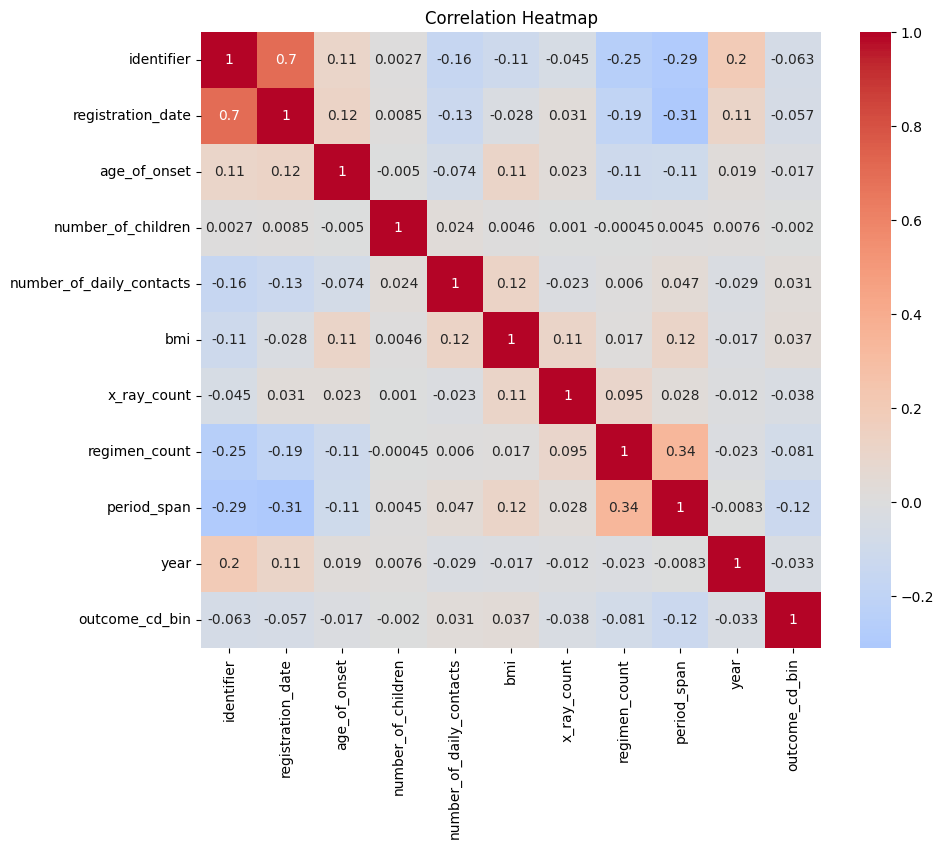

In [59]:
corr_mat = patients_total.corr()

# Plot the heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

In [66]:
from tabulate import tabulate

# Convert the correlation matrix DataFrame to a table
correlation_table = tabulate(corr_mat, headers='keys', tablefmt='grid')

print(correlation_table)

+--------------------------+--------------+---------------------+----------------+----------------------+----------------------------+-------------+---------------+-----------------+---------------+-------------+------------------+
|                          |   identifier |   registration_date |   age_of_onset |   number_of_children |   number_of_daily_contacts |         bmi |   x_ray_count |   regimen_count |   period_span |        year |   outcome_cd_bin |
+==========================+==============+=====================+================+======================+============================+=============+===============+=================+===============+=============+==================+
| identifier               |   1          |          0.699696   |     0.108312   |          0.00270961  |                -0.1598     | -0.113044   |   -0.0446823  |    -0.250675    |   -0.290756   |  0.198684   |      -0.0628452  |
+--------------------------+--------------+---------------------+-------

In [26]:
columns_list

Index(['patient_id', 'identifier', 'registration_date', 'age_of_onset',
       'gender', 'country', 'education', 'employment', 'number_of_children',
       'number_of_daily_contacts', 'case_definition', 'diagnosis_code',
       'type_of_resistance', 'bmi', 'lung_localization', 'x_ray_count',
       'comorbidity', 'regimen_count', 'regimen_drug_x', 'status',
       'condition_id', 'period_span', 'regimen_drug_y', 'outcome_cd',
       'outcome_cd_state', 'year', 'outcome_cd_bin'],
      dtype='object')

In [57]:
patients_total.dropna(how='any')

,patient_id,identifier,registration_date,age_of_onset,gender,country,education,employment,number_of_children,number_of_daily_contacts,...,regimen_count,regimen_drug_x,status,condition_id,period_span,regimen_drug_y,outcome_cd,outcome_cd_state,year,outcome_cd_bin
0,96f7d990-d005-4ecd-a22d-6d227d86a87d,6207,2020,23,Female,Georgia,Not Reported,Unemployed,0,1,...,1,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",final,000e6c76-07b4-43cc-b668-048612911ce4,182.0,"{E,H,R,Z}",cured,cured,2022,1
1,6affc79d-54c6-463f-b5af-f1f0e66776c6,9152,2019,48,Male,Moldova,"Complete school (a-level, gymnasium)",Unemployed,0,1,...,1,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",final,001dc6ee-4925-4505-a4f6-e79d2e31d1cf,203.0,"{E,H,R,Z}",cured,cured,2022,1
2,74aae92e-6a8e-437a-affc-a049f5322676,8020,2019,24,Male,Moldova,"Complete school (a-level, gymnasium)",Disabled,0,1,...,1,"Bedaquiline, Capreomycin, Cycloserine, Linezol...",final,002cea6e-758b-4e65-b4c4-ae0155a458d8,527.0,"{Bdq,Cm,Cs,Lzd,Mfx,Z}",ltfu,loss to follow up,2022,3
3,6f8bb80f-1bc8-4e2e-bf6e-b4e3bebc662d,7020,2019,37,Male,Ukraine,College (bachelor),Unemployed,0,1,...,1,"Amoxicillin-clavulanate, Bedaquiline, Capreomy...",final,00376922-57ad-47be-9b42-9fa35cfbb1a8,534.0,"{Amx/Clv,Bdq,Cm,Dld,Ipm/Cln,Lzd}",completed,completed,2022,2
4,79bf51ab-76ea-4bab-a3ab-bef40f1b618e,4195,2019,58,Male,Georgia,Not Reported,Unemployed,0,1,...,2,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",final,003e095a-db07-4abe-b07d-3050fc77f925,179.0,"{E,H,R,Z}",cured,cured,2022,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13235,8fc2ff48-8480-4630-8552-cd34f5b55770,4433,2019,31,Male,Kazakhstan,"Complete school (a-level, gymnasium)",Employed,2,3,...,2,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",final,fff0fd7b-43ac-4a3f-a5bd-665e787d9a41,0.0,"{H,R}",stillOnTreatment,loss to follow up,2023,3
13236,5d381970-8df7-4fe9-b527-ce4a9d8c5c44,8908,2020,40,Male,Ukraine,"Complete school (a-level, gymnasium)",Unemployed,0,1,...,1,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",final,fff3a550-d2ed-41bc-8584-8657bcbc7331,174.0,"{E,H,R,Z}",ltfu,loss to follow up,2023,3
13237,b03880ea-a373-4530-9959-657dff0be22d,9446,2021,37,Male,Ukraine,Not Reported,Unemployed,0,1,...,1,"Bedaquiline, Clofazimine, Cycloserine, Levoflo...",final,fffa8857-b056-4a5c-b629-9b16f29c7efb,271.0,"{Bdq,Cfz,Cs,Lfx,Lzd}",cured,cured,2023,1
13238,3efbbff9-f475-4d40-9dce-c92aac275f44,8904,2021,44,Male,Ukraine,"Complete school (a-level, gymnasium)",Unemployed,2,3,...,1,"Bedaquiline, Clofazimine, Delamanid, Levofloxa...",final,fffb6e1b-123f-46b3-ad90-ac414c74a58a,10.0,"{Bdq,Cfz,Dld,Lfx,Lzd}",died,died,2023,0


In [65]:
!pip install tabulate

In [27]:
patients_total['comorbidity'].unique()

array(['None', 'Diabetes, Hepatitis C, HIV', 'Others', 'Hepatic diseases',
       'Not specified', 'HIV', 'Hepatic diseases, HIV',
       'Hepatic diseases, None', 'Anemia, Hepatitis C, HIV',
       'Anemia, Hepatitis C', 'Diabetes', 'COVID-19, Others', 'Anemia',
       'Renal disease', 'HIV, Others', 'Anemia, Others',
       'Anemia, Renal disease', 'Diabetes, Others', 'Hepatitis C, HIV',
       'Anemia, HIV', 'Anemia, Hepatic diseases', 'Hepatitis C',
       'Diabetes, Hepatitis C', 'Anemia, HIV, Psychiatric illness',
       'COVID-19, Hepatitis C, HIV', 'Hepatitis C, HIV, Others',
       'Hepatitis B, Hepatitis C, HIV', 'Diabetes, Hepatitis B',
       'Hepatitis C, Others', 'Diabetes, Renal disease',
       'Hepatic diseases, HIV, Others', 'COVID-19, None',
       'Anemia, Psychiatric illness', 'Hepatitis B, Hepatitis C',
       'COVID-19', 'Anemia, COVID-19', 'Anemia, Hepatitis B, HIV',
       'Post-COVID-19', 'Anemia, HIV, Post-COVID-19',
       'Psychiatric illness',
       'Anem

### Feature selection...
- training features
- categorical features
- outcome

In [28]:
features = ['gender', 'country', 'education', 'employment',
                       'number_of_children', 'number_of_daily_contacts', 'type_of_resistance',
                      'lung_localization', 'x_ray_count', 'age_of_onset', 'bmi', 'period_span',
            'case_definition', 'status', 'regimen_drug_x', 'comorbidity','regimen_count', 'regimen_drug_y'
           ]
training_features = patients_total[features]

outcome = ['outcome_cd_bin']
outcome_label = patients_total[outcome]

In [29]:
categorical_columns = ['gender', 'country', 'education', 'employment',
                       'number_of_children', 'number_of_daily_contacts', 'type_of_resistance',
                      'lung_localization', 'x_ray_count', 'case_definition', 'status', 'regimen_drug_x','regimen_drug_y',
                       'regimen_count', 'comorbidity']

numerical_columns = ['age_of_onset', 'bmi', 'period_span']


### Scaling the numerical columns using the sklearn StandardScalar

In [30]:
ss = StandardScaler()
ss.fit(training_features[numerical_columns])
training_features[numerical_columns] = ss.transform(training_features[numerical_columns])
print('fitted_training features:')
training_features

fitted_training features:


C:\Users\oyeni\AppData\Local\Temp\ipykernel_8660\1298768005.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_features[numerical_columns] = ss.transform(training_features[numerical_columns])


,gender,country,education,employment,number_of_children,number_of_daily_contacts,type_of_resistance,lung_localization,x_ray_count,age_of_onset,bmi,period_span,case_definition,status,regimen_drug_x,comorbidity,regimen_count,regimen_drug_y
0,Female,Georgia,Not Reported,Unemployed,0,1,Sensitive,Pulmonary,1,-1.319428,-0.937117,-0.479000,New,final,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",None,1,"{E,H,R,Z}"
1,Male,Moldova,"Complete school (a-level, gymnasium)",Unemployed,0,1,Sensitive,Pulmonary,1,0.456071,-0.193101,-0.425257,New,final,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",None,1,"{E,H,R,Z}"
2,Male,Moldova,"Complete school (a-level, gymnasium)",Disabled,0,1,MDR non XDR,Pulmonary,1,-1.248408,1.341298,0.403926,Failure,final,"Bedaquiline, Capreomycin, Cycloserine, Linezol...",None,1,"{Bdq,Cm,Cs,Lzd,Mfx,Z}"
3,Male,Ukraine,College (bachelor),Unemployed,0,1,XDR,Pulmonary,1,-0.325148,0.769149,0.421841,Failure,final,"Amoxicillin-clavulanate, Bedaquiline, Capreomy...","Diabetes, Hepatitis C, HIV",1,"{Amx/Clv,Bdq,Cm,Dld,Ipm/Cln,Lzd}"
4,Male,Georgia,Not Reported,Unemployed,0,1,Sensitive,Pulmonary,1,1.166271,-0.937117,-0.486678,New,final,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",None,2,"{E,H,R,Z}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13235,Male,Kazakhstan,"Complete school (a-level, gymnasium)",Employed,2,3,Mono DR,Pulmonary,1,-0.751268,0.457068,-0.944775,New,final,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin","Not specified, Systemically administered gluco...",2,"{H,R}"
13236,Male,Ukraine,"Complete school (a-level, gymnasium)",Unemployed,0,1,Sensitive,Pulmonary,1,-0.112088,0.118980,-0.499474,Other,final,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",None,1,"{E,H,R,Z}"
13237,Male,Ukraine,Not Reported,Unemployed,0,1,MDR non XDR,Pulmonary,1,-0.325148,1.159250,-0.251231,New,final,"Bedaquiline, Clofazimine, Cycloserine, Levoflo...",None,1,"{Bdq,Cfz,Cs,Lfx,Lzd}"
13238,Male,Ukraine,"Complete school (a-level, gymnasium)",Unemployed,2,3,MDR non XDR,Pulmonary,1,0.171991,-0.687230,-0.919183,Chronic TB,final,"Bedaquiline, Clofazimine, Delamanid, Levofloxa...",None,1,"{Bdq,Cfz,Dld,Lfx,Lzd}"


In [31]:
training_features = pd.get_dummies(training_features,columns=categorical_columns)
training_features.head()

,age_of_onset,bmi,period_span,gender_Female,gender_Male,country_Azerbaijan,country_Belarus,country_China,country_Georgia,country_India,...,"comorbidity_Others, Post-COVID-19","comorbidity_Others, Psychiatric illness","comorbidity_Others, Renal disease","comorbidity_Others, Systemically administered glucocorticoids, cytostatics, TNF-α antagonists",comorbidity_Pneumoconiosis,comorbidity_Post-COVID-19,comorbidity_Psychiatric illness,"comorbidity_Psychiatric illness, Renal disease",comorbidity_Renal disease,"comorbidity_Systemically administered glucocorticoids, cytostatics, TNF-α antagonists"
0,-1.319428,-0.937117,-0.479000,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.456071,-0.193101,-0.425257,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.248408,1.341298,0.403926,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.325148,0.769149,0.421841,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.166271,-0.937117,-0.486678,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
engineering_features = list(set(training_features.columns) - set(numerical_columns))
print('engineering features:')
engineering_features

engineering features:


['type_of_resistance_MDR non XDR',
 'regimen_drug_x_Clofazimine, Cycloserine, Ethambutol, Isoniazid, Levofloxacin, Linezolid, Pyrazinamide',
 'regimen_drug_y_{ART,Bdq,Cfz,Cotrimoxazol,Cs,Dld,Lzd}',
 'regimen_drug_y_{Amx/Clv,Bdq,Cfz,Ipm/Cln}',
 'regimen_drug_y_{Cm,Cs,E,Pto,Z}',
 'regimen_drug_y_{Bdq,Cs,Lzd,Mfx}',
 'regimen_drug_y_{Cfz,Cs,E,H,Km,Lfx,Pto,Z}',
 'regimen_drug_y_{Bdq,Dld,Pa}',
 'type_of_resistance_Pre-XDR',
 'regimen_drug_x_Capreomycin, Cycloserine, Imipenem-cilastatin, Linezolid, Moxifloxacin, p-aminosalicylic acid, Prothionamide',
 'regimen_drug_x_Amoxicillin-clavulanate, Bedaquiline, Clofazimine, Delamanid, Imipenem-cilastatin, Isoniazid, Linezolid',
 'regimen_drug_y_{Bdq,Cm,Cs,Lfx,Lzd,Mfx,Pas,Z}',
 'regimen_drug_x_Bedaquiline, Capreomycin, Cycloserine, Ethambutol, Linezolid, Moxifloxacin, Prothionamide',
 'regimen_drug_x_Amoxicillin-clavulanate, Bedaquiline, Capreomycin, Cycloserine, Imipenem-cilastatin, Levofloxacin, Linezolid, p-aminosalicylic acid, Prothionamide, Pyra

In [33]:
training_features

,age_of_onset,bmi,period_span,gender_Female,gender_Male,country_Azerbaijan,country_Belarus,country_China,country_Georgia,country_India,...,"comorbidity_Others, Post-COVID-19","comorbidity_Others, Psychiatric illness","comorbidity_Others, Renal disease","comorbidity_Others, Systemically administered glucocorticoids, cytostatics, TNF-α antagonists",comorbidity_Pneumoconiosis,comorbidity_Post-COVID-19,comorbidity_Psychiatric illness,"comorbidity_Psychiatric illness, Renal disease",comorbidity_Renal disease,"comorbidity_Systemically administered glucocorticoids, cytostatics, TNF-α antagonists"
0,-1.319428,-0.937117,-0.479000,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.456071,-0.193101,-0.425257,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.248408,1.341298,0.403926,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.325148,0.769149,0.421841,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.166271,-0.937117,-0.486678,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13235,-0.751268,0.457068,-0.944775,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13236,-0.112088,0.118980,-0.499474,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13237,-0.325148,1.159250,-0.251231,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13238,0.171991,-0.687230,-0.919183,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
training_features.dropna()

,age_of_onset,bmi,period_span,gender_Female,gender_Male,country_Azerbaijan,country_Belarus,country_China,country_Georgia,country_India,...,"comorbidity_Others, Post-COVID-19","comorbidity_Others, Psychiatric illness","comorbidity_Others, Renal disease","comorbidity_Others, Systemically administered glucocorticoids, cytostatics, TNF-α antagonists",comorbidity_Pneumoconiosis,comorbidity_Post-COVID-19,comorbidity_Psychiatric illness,"comorbidity_Psychiatric illness, Renal disease",comorbidity_Renal disease,"comorbidity_Systemically administered glucocorticoids, cytostatics, TNF-α antagonists"
0,-1.319428,-0.937117,-0.479000,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.456071,-0.193101,-0.425257,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.248408,1.341298,0.403926,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.325148,0.769149,0.421841,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.166271,-0.937117,-0.486678,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13235,-0.751268,0.457068,-0.944775,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13236,-0.112088,0.118980,-0.499474,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13237,-0.325148,1.159250,-0.251231,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13238,0.171991,-0.687230,-0.919183,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
training_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23337 entries, 0 to 13239
Columns: 3738 entries, age_of_onset to comorbidity_Systemically administered glucocorticoids, cytostatics,  TNF-α antagonists
dtypes: float64(3), uint8(3735)
memory usage: 83.8 MB


In [36]:
col = training_features.columns
col

Index(['age_of_onset', 'bmi', 'period_span', 'gender_Female', 'gender_Male',
       'country_Azerbaijan', 'country_Belarus', 'country_China',
       'country_Georgia', 'country_India',
       ...
       'comorbidity_Others, Post-COVID-19',
       'comorbidity_Others, Psychiatric illness',
       'comorbidity_Others, Renal disease',
       'comorbidity_Others, Systemically administered glucocorticoids, cytostatics,  TNF-α antagonists',
       'comorbidity_Pneumoconiosis', 'comorbidity_Post-COVID-19',
       'comorbidity_Psychiatric illness',
       'comorbidity_Psychiatric illness, Renal disease',
       'comorbidity_Renal disease',
       'comorbidity_Systemically administered glucocorticoids, cytostatics,  TNF-α antagonists'],
      dtype='object', length=3738)

### Splitting the data into:
    - TRAINING and
    - TESTING
    data with 0.3 test size - 30%

In [38]:
x_train, x_test, y_train, y_test = train_test_split(training_features, outcome_label, test_size=0.3, random_state=30)
x_test

,age_of_onset,bmi,period_span,gender_Female,gender_Male,country_Azerbaijan,country_Belarus,country_China,country_Georgia,country_India,...,"comorbidity_Others, Post-COVID-19","comorbidity_Others, Psychiatric illness","comorbidity_Others, Renal disease","comorbidity_Others, Systemically administered glucocorticoids, cytostatics, TNF-α antagonists",comorbidity_Pneumoconiosis,comorbidity_Post-COVID-19,comorbidity_Psychiatric illness,"comorbidity_Psychiatric illness, Renal disease",comorbidity_Renal disease,"comorbidity_Systemically administered glucocorticoids, cytostatics, TNF-α antagonists"
9875,-0.893308,1.029217,-0.243553,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5103,-1.248408,-0.349142,-0.225639,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2629,-2.029627,-1.727500,-0.228198,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6741,-0.041068,0.275021,0.342505,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
11506,-0.680248,1.575359,-0.624875,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,0.029952,-0.245115,0.260611,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1477,0.811171,-0.937117,-0.898710,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1884,-0.183108,-0.937117,-0.604401,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10253,-0.254128,-0.791257,-0.714447,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
y_test.value_counts()

outcome_cd_bin
1                 3831
3                 1131
2                  810
0                  672
4                  558
dtype: int64

In [40]:
x_test_rf = x_test.copy()
x_test_lr = x_test.copy()
x_test_svm = x_test.copy()
x_test_knn = x_test.copy()

In [41]:
y_train['state'] = y_train['outcome_cd_bin'].apply(lambda x: 'cured' if x == 1 \
                                                                                       else ('died' if x == 0 \
                                                                                                  else('completed' if x == 2\
                                                                                                      else('loss to follow up' if x == 3 else 'failure'))))

y_test['state'] = y_test['outcome_cd_bin'].apply(lambda x: 'cured' if x == 1 \
                                                                                       else ('died' if x == 0 \
                                                                                                  else('completed' if x == 2\
                                                                                                      else('loss to follow up' if x == 3 else 'failure'))))

### Logistic Regression model:
- is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary).  Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.


In [42]:
y_train

,outcome_cd_bin,state
7757,1,cured
13036,1,cured
5514,0,died
6172,1,cured
12548,4,failure
...,...,...
500,1,cured
1980,1,cured
5180,1,cured
4517,1,cured


In [43]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}# l1 lasso l2 ridge
lr=LogisticRegression()
cv_lr=GridSearchCV(lr,grid,cv=10)
cv_lr.fit(x_train,y_train['outcome_cd_bin'])

c:\Users\oyeni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\oyeni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l2']})

    Data frame containing each combinations of the hyperparameter tuned

In [44]:
df2 = pd.DataFrame({'param': cv_lr.cv_results_["params"], 'acc': cv_lr.cv_results_["mean_test_score"]})
df2.to_csv('logistic_regression_search.csv')
df2.head()

,param,acc
0,"{'C': 0.001, 'penalty': 'l2'}",0.615366
1,"{'C': 0.01, 'penalty': 'l2'}",0.675604
2,"{'C': 0.1, 'penalty': 'l2'}",0.702724
3,"{'C': 1.0, 'penalty': 'l2'}",0.738353
4,"{'C': 10.0, 'penalty': 'l2'}",0.746496


    The best score

In [45]:
print(cv_lr.best_params_)
print(cv_lr.best_score_)

{'C': 1000.0, 'penalty': 'l2'}
0.7466798984530352


In [46]:
lr = LogisticRegression(C=10, penalty='l2')
model_lr = lr.fit(x_train, y_train['outcome_cd_bin'])

c:\Users\oyeni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy score: 0.8054484236302418

classification report:
               precision    recall  f1-score   support

           0       0.75      0.62      0.68      1474
           1       0.82      0.94      0.87      9024
           2       0.75      0.54      0.63      1850
           3       0.82      0.76      0.79      2756
           4       0.79      0.53      0.63      1231

    accuracy                           0.81     16335
   macro avg       0.79      0.68      0.72     16335
weighted avg       0.80      0.81      0.80     16335


confusion matrix:
 [[ 913  258   45  223   35]
 [ 116 8507  210  110   81]
 [  39  740  991   52   28]
 [ 103  492   40 2094   27]
 [  51  437   29   62  652]]

precison,recall,fscore,support ARRAYS:
 (array([0.74713584, 0.81531532, 0.75361217, 0.82408501, 0.79222357]), array([0.61940299, 0.94270833, 0.53567568, 0.75979681, 0.52965069]), array([0.6772997 , 0.87439614, 0.62622433, 0.79063621, 0.63485881]), array([1474, 9024, 1850, 2756, 1231], dty

<AxesSubplot: >

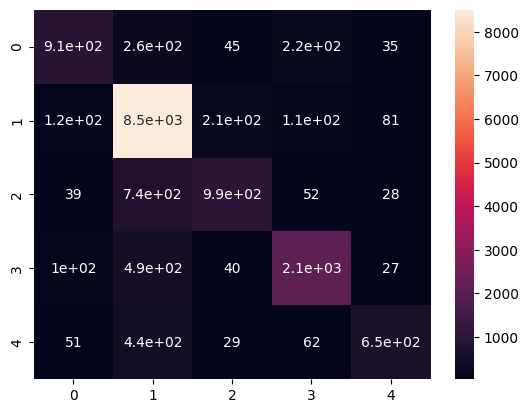

In [47]:
predicted_label  = model_lr.predict(x_train)
actual_label = np.array(y_train['outcome_cd_bin'])
print('accuracy score:',accuracy_score(actual_label,predicted_label))
print('\nclassification report:\n',classification_report(actual_label,predicted_label, labels=[0,1,2,3,4]))
print('\nconfusion matrix:\n',confusion_matrix(actual_label,predicted_label))
print('\nprecison,recall,fscore,support ARRAYS:\n',precision_recall_fscore_support(actual_label,predicted_label))
# def specificity(y_true , y_pred):
#     w,x,y,z = precision_recall_fscore_support(actual_label,predicted_label,average='micro')
#     return(x[0])
print('\nsensitivity score:\n',recall_score(actual_label,predicted_label, average='micro'))
# print('\nspecificity score:\n',specificity(actual_label,predicted_label))

cm = confusion_matrix(actual_label,predicted_label)
sns.heatmap(cm,annot=True)

#### Approximately 80% accuracy on the training set
#### This summary shows:
- confusion matrix 
- classification report
- precision, recall score
- and also a heatmap showing the confusion matrix

In [48]:
print('Accuracy on test dataset: ', accuracy_score(y_test['outcome_cd_bin'], model_lr.predict(x_test)))

Accuracy on test dataset:  0.7500714081690946


- 75.01% accuracy on the test set.

accuracy score: 0.7500714081690946

classification report:
               precision    recall  f1-score   support

           0       0.63      0.51      0.56       672
           1       0.78      0.92      0.85      3831
           2       0.65      0.43      0.52       810
           3       0.74      0.72      0.73      1131
           4       0.69      0.40      0.51       558

    accuracy                           0.75      7002
   macro avg       0.70      0.60      0.63      7002
weighted avg       0.74      0.75      0.74      7002


confusion matrix:
 [[ 340  141   26  136   29]
 [  53 3525  122   84   47]
 [  32  393  348   29    8]
 [  67  200   32  814   18]
 [  45  235   11   42  225]]

precison,recall,fscore,support ARRAYS:
 (array([0.63314711, 0.78437917, 0.64564007, 0.73665158, 0.68807339]), array([0.50595238, 0.92012529, 0.42962963, 0.71971706, 0.40322581]), array([0.5624483 , 0.84684685, 0.51593773, 0.72808587, 0.50847458]), array([ 672, 3831,  810, 1131,  558], dty

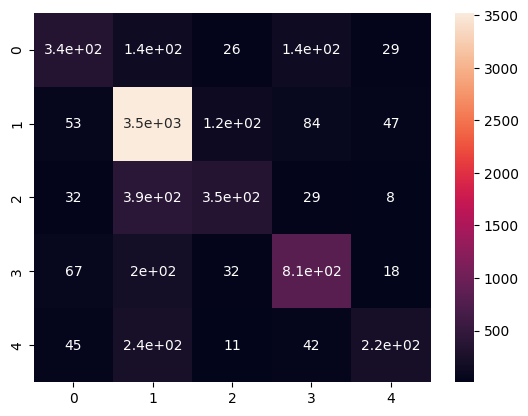

In [145]:
predicted_label2  = model_lr.predict(x_test)
actual_label2 = np.array(y_test['outcome_cd_bin'])
print('accuracy score:',accuracy_score(actual_label2,predicted_label2))
print('\nclassification report:\n',classification_report(actual_label2,predicted_label2))
print('\nconfusion matrix:\n',confusion_matrix(actual_label2,predicted_label2))
print('\nprecison,recall,fscore,support ARRAYS:\n',precision_recall_fscore_support(actual_label2,predicted_label2))
# def specificity(y_true , y_pred):
#     w,x,y,z = precision_recall_fscore_support(actual_label2,predicted_label2)
#     return(x[0])
print('\nsensitivity score:\n',recall_score(actual_label2,predicted_label2,average='micro'))
# print('\nspecificity score:\n',specificity(actual_label2,predicted_label2))

cm = confusion_matrix(actual_label2,predicted_label2)

sns.heatmap(cm,annot=True)
plt.show()

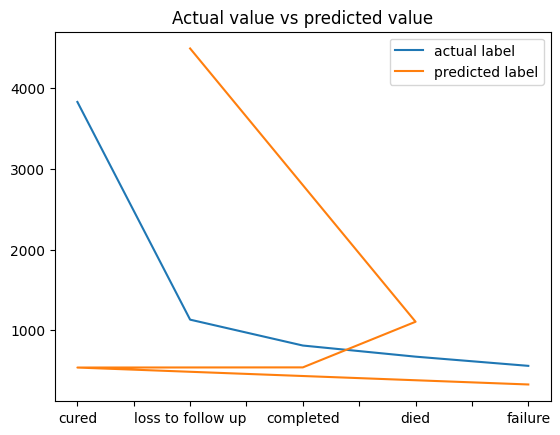

In [146]:
y_pred_lr = model_lr.predict(x_test_lr)
x_test_lr['actual_label'] = y_test['state'] 
x_test_lr['predicted_label'] = y_pred_lr

y_pred_lr = pd.DataFrame(y_pred_lr, columns=['outcome_cd_bin'])

y_pred_lr['state'] = y_pred_lr['outcome_cd_bin'].apply(lambda x: 1 if x == 'cured' \
                                                                                       else (0 if x == 'died' \
                                                                                                  else(2 if x == 'completed'\
                                                                                                      else(3 if x == 'loss to follow up' else 'failure'))))

x_test_lr['actual_label'].value_counts().plot(label='actual label')
x_test_lr['predicted_label'].value_counts().plot(label='predicted label', title = 'Actual value vs predicted value')
plt.legend()
plt.savefig('lr_comparison.jpg')

#### Stratified K-fold validation with 10 splits to evaluate the Logistic Regression models' performance

c:\Users\oyeni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\oyeni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

scores:  [0.68473609 0.70042796 0.70571429 0.73714286 0.70714286 0.69571429
 0.74       0.71714286 0.71428571 0.72571429]
Average/ Mean score:  0.7128021194212351


c:\Users\oyeni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot: title={'center': ' lr K-fold scores'}>

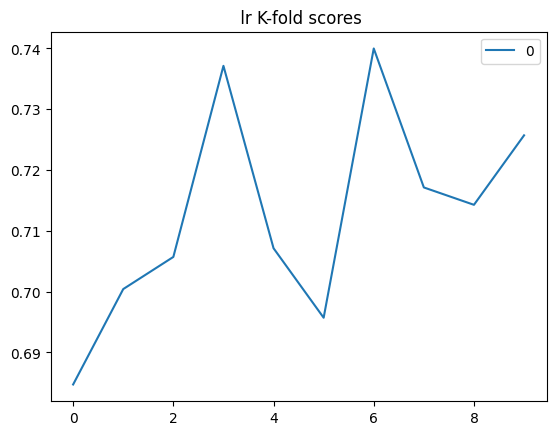

In [147]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
skfold=StratifiedKFold(n_splits=10)
scores=cross_val_score(model_lr ,x_test, y_test['outcome_cd_bin'],cv=skfold)
print('scores: ',scores)
print('Average/ Mean score: ', np.mean(scores))
pd.DataFrame(scores).plot(title=' lr K-fold scores')

### Random Forest model:
     is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of   decision trees at training time.
          It is also an estimator that fits a number of decision tree classifiers on various sub-samples of the data set and uses averaging to improve the predictive accuracy and control over-fitting.
     For classification tasks, the output of the random forest is the class selected by most trees

![random forest](RandomForestClassification.jpg)

In [148]:
rf = RandomForestClassifier()

In [149]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 

param_grid = { 
    'n_estimators': list(range(1,10)),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
cv_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5, scoring='accuracy')
cv_rf.fit(x_train, y_train['outcome_cd_bin'])

c:\Users\oyeni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\oyeni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\oyeni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicit

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy')

    The Data Frame showing the parameter combinations

In [223]:
df1 = pd.DataFrame({'param': cv_rf.cv_results_["params"], 'acc': cv_rf.cv_results_["mean_test_score"]})
df1.to_csv('randomforest_search.csv')
df1.head()

,param,acc
0,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.573554
1,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.579920
2,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.560882
3,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.570738
4,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.555617


     Best params and Best score

In [151]:
print(cv_rf.best_params_)
print(cv_rf.best_score_)

{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 1}
0.5991429445974901


In [153]:
rf = RandomForestClassifier(criterion='entropy', max_depth=7, max_features='sqrt', n_estimators=1)
model_rf = rf.fit(x_train, y_train['outcome_cd_bin'])

accuracy score: 0.557636975818794

classification report:
               precision    recall  f1-score   support

           0       0.69      0.01      0.03      1474
           1       0.56      0.97      0.71      9024
           2       0.61      0.05      0.09      1850
           3       0.38      0.09      0.15      2756
           4       0.78      0.01      0.01      1231

    accuracy                           0.56     16335
   macro avg       0.60      0.23      0.20     16335
weighted avg       0.57      0.56      0.43     16335


confusion matrix:
 [[  22 1394    8   50    0]
 [   1 8731   36  255    1]
 [   2 1706   89   53    0]
 [   5 2482    8  260    1]
 [   2 1153    4   65    7]]

precison,recall,fscore,support ARRAYS:
 (array([0.6875    , 0.56452864, 0.6137931 , 0.3806735 , 0.77777778]), array([0.01492537, 0.96753103, 0.04810811, 0.09433962, 0.00568643]), array([0.02921647, 0.71302572, 0.08922306, 0.15120675, 0.01129032]), array([1474, 9024, 1850, 2756, 1231], dtyp

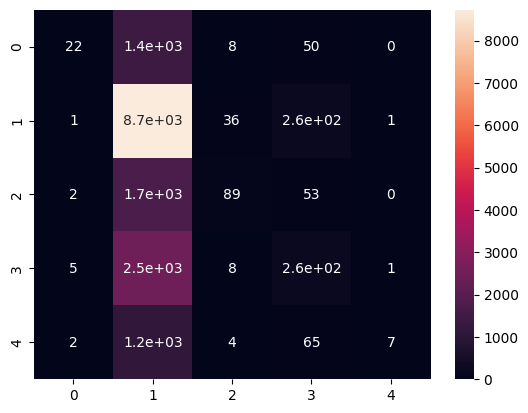

In [154]:
predicted_label  = model_rf.predict(x_train)
actual_label = np.array(y_train['outcome_cd_bin'])
print('accuracy score:',accuracy_score(actual_label,predicted_label))
print('\nclassification report:\n',classification_report(actual_label,predicted_label))
print('\nconfusion matrix:\n',confusion_matrix(actual_label,predicted_label))
print('\nprecison,recall,fscore,support ARRAYS:\n',precision_recall_fscore_support(actual_label,predicted_label))
# def specificity(y_true , y_pred):
#     w,x,y,z = precision_recall_fscore_support(actual_label,predicted_label)
#     return(x[0])
print('\nsensitivity score:\n',recall_score(actual_label,predicted_label,average='micro'))
# print('\nspecificity score:\n',specificity(actual_label,predicted_label))

cm = confusion_matrix(actual_label,predicted_label)

sns.heatmap(cm,annot=True)
plt.show()

#### Approximately 56% accuracy on the training set
#### This summary shows:
- confusion matrix 
- classification report
- precision, recall score
- and also a heatmap showing the confusion matrix

In [155]:
print('Accuracy on test dataset: ', accuracy_score(y_test['outcome_cd_bin'], model_rf.predict(x_test)))

Accuracy on test dataset:  0.5501285347043702


#### 55% accuracy on test set

accuracy score: 0.5501285347043702

classification report:
               precision    recall  f1-score   support

           0       0.25      0.01      0.01       672
           1       0.56      0.97      0.71      3831
           2       0.51      0.03      0.05       810
           3       0.38      0.09      0.14      1131
           4       0.43      0.01      0.01       558

    accuracy                           0.55      7002
   macro avg       0.42      0.22      0.19      7002
weighted avg       0.48      0.55      0.42      7002


confusion matrix:
 [[   4  643    5   20    0]
 [   3 3722   13   90    3]
 [   0  750   23   36    1]
 [   7 1021    3  100    0]
 [   2  532    1   20    3]]

precison,recall,fscore,support ARRAYS:
 (array([0.25      , 0.55818836, 0.51111111, 0.37593985, 0.42857143]), array([0.00595238, 0.9715479 , 0.02839506, 0.08841733, 0.00537634]), array([0.01162791, 0.70901991, 0.05380117, 0.14316392, 0.01061947]), array([ 672, 3831,  810, 1131,  558], dty

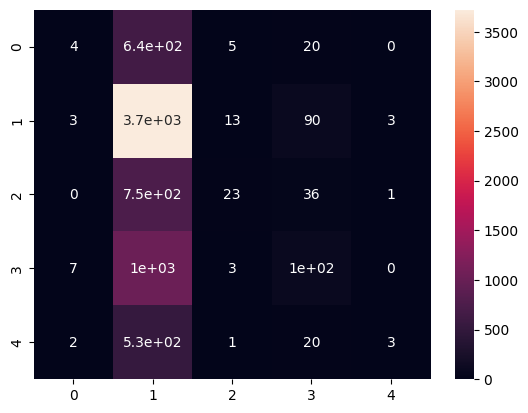

In [156]:
predicted_label2  = model_rf.predict(x_test)
actual_label2 = np.array(y_test['outcome_cd_bin'])
print('accuracy score:',accuracy_score(actual_label2,predicted_label2))
print('\nclassification report:\n',classification_report(actual_label2,predicted_label2))
print('\nconfusion matrix:\n',confusion_matrix(actual_label2,predicted_label2))
print('\nprecison,recall,fscore,support ARRAYS:\n',precision_recall_fscore_support(actual_label2,predicted_label2))
# def specificity(y_true , y_pred):
#     w,x,y,z = precision_recall_fscore_support(actual_label2,predicted_label2)
#     return(x[0])
print('\nsensitivity score:\n',recall_score(actual_label2,predicted_label2,average='micro'))
# print('\nspecificity score:\n',specificity(actual_label2,predicted_label2))

cm = confusion_matrix(actual_label2,predicted_label2)

sns.heatmap(cm,annot=True)
plt.show()

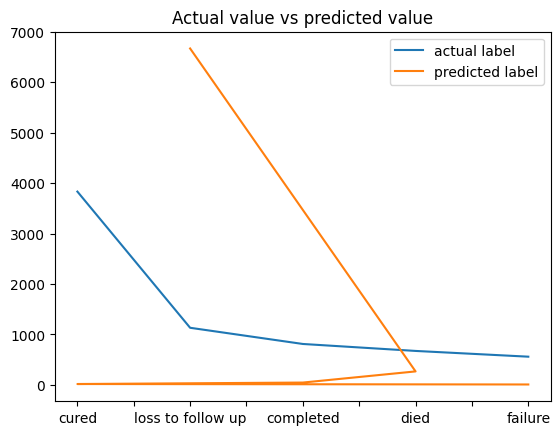

In [157]:
y_pred_rf = model_rf.predict(x_test_rf)
x_test_rf['actual_label'] = y_test['state'] 
x_test_rf['predicted_label'] = y_pred_rf

y_pred_rf = pd.DataFrame(y_pred_rf, columns=['outcome_cd_bin'])

y_pred_rf['state'] = y_pred_rf['outcome_cd_bin'].apply(lambda x: 1 if x == 'cured' \
                                                                                       else (0 if x == 'died' \
                                                                                                  else(2 if x == 'completed'\
                                                                                                      else(3 if x == 'loss to follow up' else 'failure'))))

x_test_rf['actual_label'].value_counts().plot(label='actual label')
x_test_rf['predicted_label'].value_counts().plot(label='predicted label', title = 'Actual value vs predicted value')
plt.legend()
plt.savefig('rf_comparison.jpg')

#### Stratified K-fold validation with 10 splits to evaluate the  Random Forest models' performance

scores:  [0.55634807 0.55349501 0.57428571 0.57142857 0.56       0.57
 0.55857143 0.54428571 0.57571429 0.55714286]
Average/ Mean score:  0.5621271652740981


<AxesSubplot: title={'center': ' rf K-fold scores'}>

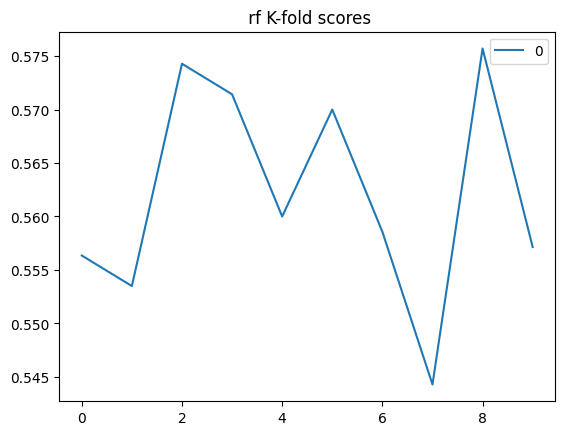

In [158]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
skfold=StratifiedKFold(n_splits=10)
scores=cross_val_score(model_rf ,x_test, y_test['outcome_cd_bin'],cv=skfold)
print('scores: ',scores)
print('Average/ Mean score: ', np.mean(scores))
pd.DataFrame(scores).plot(title=' rf K-fold scores')

### Support Vector Machine

In [159]:
# svc = SVC()
# model_svc = svc.fit(x_train,np.array(y_train['outcome_cd_bin']))

In [160]:
# predicted_label  = model_svc.predict(x_train)
# actual_label = np.array(y_train['outcome_cd_bin'])
# print('accuracy score:',accuracy_score(actual_label,predicted_label))
# print('\nclassification report:\n',classification_report(actual_label,predicted_label))
# print('\nconfusion matrix:\n',confusion_matrix(actual_label,predicted_label))
# print('\nprecison,recall,fscore,support ARRAYS:\n',precision_recall_fscore_support(actual_label,predicted_label))
# # def specificity(y_true , y_pred):
# #     w,x,y,z = precision_recall_fscore_support(actual_label,predicted_label)
# #     return(x[0])
# print('\nsensitivity score:\n',recall_score(actual_label,predicted_label,average='micro'))
# # print('\nspecificity score:\n',specificity(actual_label,predicted_label))

# cm = confusion_matrix(actual_label,predicted_label)

# sns.heatmap(cm,annot=True)
# plt.show()

#### 82% accuracy on the training set
#### This summary shows:
- confusion matrix 
- classification report
- precision, recall score
- and also a heatmap showing the confusion matrix

In [161]:
# print('Accuracy on test dataset: ', accuracy_score(y_test['outcome_cd_bin'], model_svc.predict(x_test)))

    77% accuracy on test set

In [162]:
# predicted_label2  = model_svc.predict(x_test)
# actual_label2 = np.array(y_test['outcome_cd_bin'])
# print('accuracy score:',accuracy_score(actual_label2,predicted_label2))
# print('\nclassification report:\n',classification_report(actual_label2,predicted_label2))
# print('\nconfusion matrix:\n',confusion_matrix(actual_label2,predicted_label2))
# print('\nprecison,recall,fscore,support ARRAYS:\n',precision_recall_fscore_support(actual_label2,predicted_label2))
# # def specificity(y_true , y_pred):
# #     w,x,y,z = precision_recall_fscore_support(actual_label2,predicted_label2)
# #     return(x[0])
# print('\nsensitivity score:\n',recall_score(actual_label2,predicted_label2,average='micro'))
# # print('\nspecificity score:\n',specificity(actual_label2,predicted_label2))

# cm = confusion_matrix(actual_label2,predicted_label2)

# sns.heatmap(cm,annot=True)
# plt.show()

In [163]:
# y_pred_svc = model_svc.predict(x_test_svm)
# x_test_svm['actual_label'] = y_test['state'] 
# x_test_svm['predicted_label'] = y_pred_svc

# y_pred_svc = pd.DataFrame(y_pred_svc, columns=['outcome_cd_bin'])

# y_pred_svc['state'] = y_pred_svc['outcome_cd_bin'].apply(lambda x: 1 if x == 'cured' \
#                                                                                        else (0 if x == 'died' \
#                                                                                                   else(2 if x == 'completed'\
#                                                                                                       else(3 if x == 'loss to follow up' else 'failure'))))

# x_test_svm['actual_label'].value_counts().plot(label='actual label')
# x_test_svm['predicted_label'].value_counts().plot(label='predicted label', title = 'Actual value vs predicted value')
# plt.legend()
# plt.savefig('svm_comparison.jpg')

### K Nearest Neighbours:
    is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. While it can be used for either regression or classification problems, it is typically used as a classification algorithm, working off the assumption that similar points can be found near one another.

In [173]:
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)

In [176]:
knn = KNeighborsClassifier()
cv_knn = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)
cv_knn.fit(x_train, y_train['outcome_cd_bin'])

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

    The Data Frame showing the different combinations of the hyper parameters

In [225]:
df3 = pd.DataFrame({'param': cv_knn.cv_results_["params"], 'acc': cv_knn.cv_results_["mean_test_score"]}).head()
df3.to_csv('Knn_search.csv')
df3.head()

,param,acc
0,"{'n_neighbors': 1, 'weights': 'uniform'}",0.855220
1,"{'n_neighbors': 1, 'weights': 'distance'}",0.855220
2,"{'n_neighbors': 2, 'weights': 'uniform'}",0.771595
3,"{'n_neighbors': 2, 'weights': 'distance'}",0.855465
4,"{'n_neighbors': 3, 'weights': 'uniform'}",0.733578


    The best parameters and the best score

In [178]:
print(cv_knn.best_params_)
print(cv_knn.best_score_)

{'n_neighbors': 2, 'weights': 'distance'}
0.8554650075965344


In [217]:
knn = KNeighborsClassifier(n_neighbors=2, weights='distance')
model_knn = knn.fit(x_train,np.array(y_train['outcome_cd_bin']))

accuracy score: 0.8670379891459583

classification report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81       672
           1       0.91      0.92      0.92      3831
           2       0.77      0.75      0.76       810
           3       0.84      0.84      0.84      1131
           4       0.80      0.79      0.79       558

    accuracy                           0.87      7002
   macro avg       0.83      0.82      0.82      7002
weighted avg       0.87      0.87      0.87      7002


confusion matrix:
 [[ 533   59    6   49   25]
 [  36 3537  126   76   56]
 [  16  135  611   35   13]
 [  33  102   29  951   16]
 [  24   56   22   17  439]]

precison,recall,fscore,support ARRAYS:
 (array([0.83021807, 0.9094883 , 0.76952141, 0.84308511, 0.7996357 ]), array([0.79315476, 0.92325764, 0.75432099, 0.84084881, 0.78673835]), array([0.81126332, 0.91632124, 0.76184539, 0.84196547, 0.7931346 ]), array([ 672, 3831,  810, 1131,  558], dty

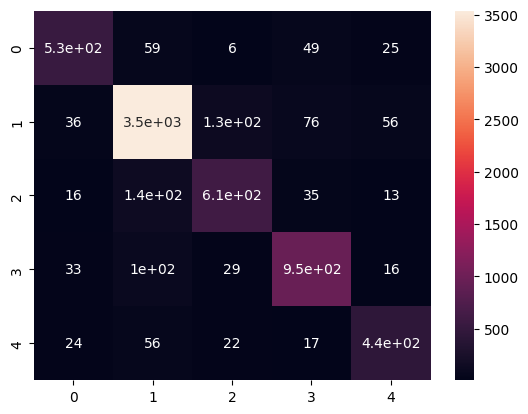

In [218]:
predicted_label  = model_knn.predict(x_test)
actual_label = np.array(y_test['outcome_cd_bin'])
print('accuracy score:',accuracy_score(actual_label,predicted_label))
print('\nclassification report:\n',classification_report(actual_label,predicted_label))
print('\nconfusion matrix:\n',confusion_matrix(actual_label,predicted_label))
print('\nprecison,recall,fscore,support ARRAYS:\n',precision_recall_fscore_support(actual_label,predicted_label))
# def specificity(y_true , y_pred):
#     w,x,y,z = precision_recall_fscore_support(actual_label,predicted_label)
#     return(x[0])
print('\nsensitivity score:\n',recall_score(actual_label,predicted_label,average='micro'))
# print('\nspecificity score:\n',specificity(actual_label,predicted_label))

cm = confusion_matrix(actual_label,predicted_label)

sns.heatmap(cm,annot=True)
plt.show()

#### 86.7% accuracy on the training set
#### This summary shows:
- confusion matrix 
- classification report
- precision, recall score
- and also a heatmap showing the confusion matrix

In [219]:
print('Accuracy on test dataset: ', accuracy_score(y_test['outcome_cd_bin'], model_knn.predict(x_test)))

Accuracy on test dataset:  0.8670379891459583


- 86.70% accuracy on test set

accuracy score: 0.7843473293344758

classification report:
               precision    recall  f1-score   support

           0       0.62      0.82      0.71       672
           1       0.82      0.93      0.87      3831
           2       0.73      0.56      0.64       810
           3       0.82      0.62      0.71      1131
           4       0.79      0.37      0.51       558

    accuracy                           0.78      7002
   macro avg       0.76      0.66      0.69      7002
weighted avg       0.79      0.78      0.77      7002


confusion matrix:
 [[ 554   58   10   35   15]
 [ 123 3570   67   43   28]
 [  33  296  457   17    7]
 [ 106  264   53  702    6]
 [  74  180   41   54  209]]

precison,recall,fscore,support ARRAYS:
 (array([0.62247191, 0.81730769, 0.72770701, 0.82491187, 0.78867925]), array([0.82440476, 0.93187157, 0.56419753, 0.62068966, 0.37455197]), array([0.70934699, 0.87083791, 0.63560501, 0.70837538, 0.50789793]), array([ 672, 3831,  810, 1131,  558], dty

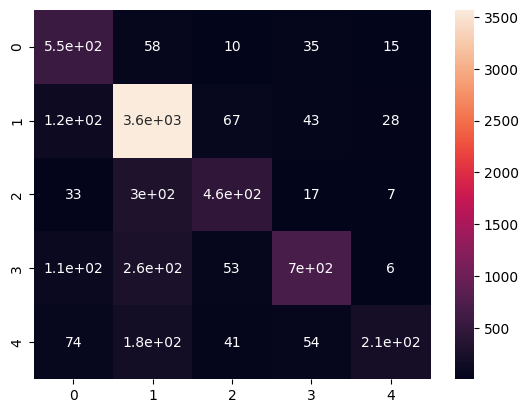

In [185]:
predicted_label2  = model_knn.predict(x_test)
actual_label2 = np.array(y_test['outcome_cd_bin'])
print('accuracy score:',accuracy_score(actual_label2,predicted_label2))
print('\nclassification report:\n',classification_report(actual_label2,predicted_label2))
print('\nconfusion matrix:\n',confusion_matrix(actual_label2,predicted_label2))
print('\nprecison,recall,fscore,support ARRAYS:\n',precision_recall_fscore_support(actual_label2,predicted_label2))
# def specificity(y_true , y_pred):
#     w,x,y,z = precision_recall_fscore_support(actual_label2,predicted_label2)
#     return(x[0])
print('\nsensitivity score:\n',recall_score(actual_label2,predicted_label2,average='micro'))
# print('\nspecificity score:\n',specificity(actual_label2,predicted_label2))

cm = confusion_matrix(actual_label2,predicted_label2)

sns.heatmap(cm,annot=True)
plt.show()

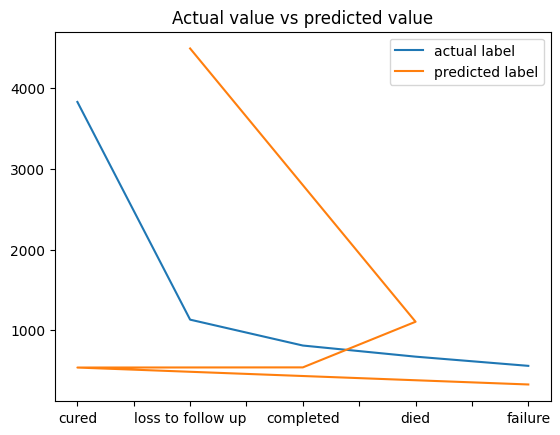

In [186]:
y_pred_knn = model_lr.predict(x_test_knn)
x_test_knn['actual_label'] = y_test['state'] 
x_test_knn['predicted_label'] = y_pred_knn

y_pred_knn = pd.DataFrame(y_pred_knn, columns=['outcome_cd_bin'])

y_pred_knn['state'] = y_pred_knn['outcome_cd_bin'].apply(lambda x: 1 if x == 'cured' \
                                                                                       else (0 if x == 'died' \
                                                                                                  else(2 if x == 'completed'\
                                                                                                      else(3 if x == 'loss to follow up' else 'failure'))))

x_test_knn['actual_label'].value_counts().plot(label='actual label')
x_test_knn['predicted_label'].value_counts().plot(label='predicted label', title = 'Actual value vs predicted value')
plt.legend()
plt.savefig('knn_comparison.jpg')

#### Stratified K-fold validation with 10 splits to evaluate the k nearest neighbor models' performance

scores:  [0.72467903 0.69900143 0.71285714 0.73142857 0.73857143 0.73571429
 0.72       0.74571429 0.72285714 0.72142857]
Average/ Mean score:  0.7252251885062156


<AxesSubplot: title={'center': 'knn K-fold scores'}>

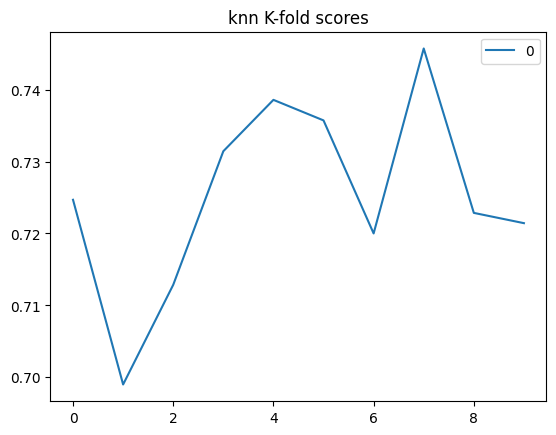

In [220]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
skfold=StratifiedKFold(n_splits=10)
scores=cross_val_score(model_knn, x_test, y_test['outcome_cd_bin'],cv=skfold)
print('scores: ',scores)
print('Average/ Mean score: ', np.mean(scores))
pd.DataFrame(scores).plot(title='knn K-fold scores')

### LOSS CURVE for GLOBAL DATA

In [188]:
# from sklearn.neural_network import MLPClassifier
# import matplotlib.pyplot as plt

# def NeuralClass(X,y):
#     X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
#     X_tr,X_val,y_tr,y_val=train_test_split(X_train,y_train,test_size=0.2)
#     mlp=MLPClassifier(activation="relu",max_iter=3000)
#     mlp.fit(X_train,y_train)
#     print (mlp.score(X_train,y_train))
#     plt.plot(mlp.loss_curve_, label='train loss curve')
#     mlp.fit(X_val,y_val)
#     plt.plot(mlp.loss_curve_, label='test loss curve')
#     plt.title('Train Test Loss curve')
#     plt.legend()
#     plt.savefig('loss_curve.png')


# NeuralClass(training_features, outcome_label)

In [189]:
# import matplotlib.pyplot as plt
# import numpy as np

# from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

# fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 6), sharey=True)

# common_params = {
#     "X": x_test,
#     "y": y_test['outcome_cd_bin'],
#     "train_sizes": np.linspace(0.1, 1.0, 5),
#     "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
#     "score_type": "both",
#     "n_jobs": 4,
#     "line_kw": {"marker": "o"},
#     "std_display_style": "fill_between",
#     "score_name": "Accuracy",
# }

# for ax_idx, estimator in enumerate([model_rf, model_lr, model_knn]):
#     LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
#     handles, label = ax[ax_idx].get_legend_handles_labels()
#     ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
#     ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")
# plt.savefig('learning_curve.png')

#### Nigerian based Tuberculosis data

In [190]:
patients_nig_copy.head()

,patient_id,registration_date,age_of_onset,gender,country,employment,number_of_daily_contacts,case_definition,lung_localization,regimen_count,outcome,treatment_status,regimen_drug,comorbidity,specimen,ncbi_sourceorganism,x_ray_exists,diagnosis_code,genexpert_test,type_of_resistance
0,2910220001,2022,83,Female,Nigeria,Retired,0,New,Pulmonary,1,Completed,Treatment ended,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",None,Sputum,Mycobacterium tuberculosis,Yes,A15.0,S,Sensitive
1,2910220002,2022,35,Male,Nigeria,Employed,1,New,Pulmonary,1,Lost to follow up,Patient stopped treatment,"Ethambutol, Isoniazid, Levofloxacin, Pyrazinam...",None,Sputum,Mycobacterium tuberculosis,Yes,A15.0,R,Mono DR
2,2910220003,2022,37,Female,Nigeria,Employed,1,New,Pulmonary,1,Cured,Treatment ended,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",None,Sputum,Mycobacterium tuberculosis,No,A15.0,R,Sensitive
3,2910220004,2022,35,Male,Nigeria,Employed,1,New,Pulmonary,1,Cured,Treatment ended,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",HIV,Sputum,Mycobacterium tuberculosis,No,A15.0,R,Sensitive
4,2910220005,2022,31,Male,Nigeria,Employed,0,New,Pulmonary,1,Completed,Treatment ended,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",None,Sputum,Mycobacterium tuberculosis,No,A15.0,S,Sensitive


In [191]:
patients_nig_copy.describe()

,patient_id,registration_date,number_of_daily_contacts,regimen_count
count,2.530000e+02,253.000000,253.000000,253.000000
mean,2.910220e+09,2022.059289,1.375494,1.003953
std,7.341816e+03,0.236632,1.651512,0.062869
min,2.910110e+09,2022.000000,0.000000,1.000000
25%,2.910220e+09,2022.000000,0.000000,1.000000
50%,2.910220e+09,2022.000000,1.000000,1.000000
75%,2.910220e+09,2022.000000,2.000000,1.000000
max,2.910230e+09,2023.000000,7.000000,2.000000


In [192]:
patients_nig_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   patient_id                253 non-null    int64 
 1   registration_date         253 non-null    int64 
 2   age_of_onset              253 non-null    object
 3   gender                    253 non-null    object
 4   country                   253 non-null    object
 5   employment                253 non-null    object
 6   number_of_daily_contacts  253 non-null    int64 
 7   case_definition           253 non-null    object
 8   lung_localization         253 non-null    object
 9   regimen_count             253 non-null    int64 
 10  outcome                   253 non-null    object
 11  treatment_status          246 non-null    object
 12  regimen_drug              253 non-null    object
 13  comorbidity               253 non-null    object
 14  specimen                  

In [193]:
col_ng = patients_nig_copy.columns
col_ng

Index(['patient_id', 'registration_date', 'age_of_onset', 'gender', 'country',
       'employment', 'number_of_daily_contacts', 'case_definition',
       'lung_localization', 'regimen_count', 'outcome', 'treatment_status',
       'regimen_drug', 'comorbidity', 'specimen', 'ncbi_sourceorganism',
       'x_ray_exists', 'diagnosis_code', 'genexpert_test',
       'type_of_resistance'],
      dtype='object')

In [194]:
# Drop all null values
patients_nig_copy.dropna(how='any',inplace=True)
patients_nig_copy.head()

,patient_id,registration_date,age_of_onset,gender,country,employment,number_of_daily_contacts,case_definition,lung_localization,regimen_count,outcome,treatment_status,regimen_drug,comorbidity,specimen,ncbi_sourceorganism,x_ray_exists,diagnosis_code,genexpert_test,type_of_resistance
0,2910220001,2022,83,Female,Nigeria,Retired,0,New,Pulmonary,1,Completed,Treatment ended,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",None,Sputum,Mycobacterium tuberculosis,Yes,A15.0,S,Sensitive
1,2910220002,2022,35,Male,Nigeria,Employed,1,New,Pulmonary,1,Lost to follow up,Patient stopped treatment,"Ethambutol, Isoniazid, Levofloxacin, Pyrazinam...",None,Sputum,Mycobacterium tuberculosis,Yes,A15.0,R,Mono DR
2,2910220003,2022,37,Female,Nigeria,Employed,1,New,Pulmonary,1,Cured,Treatment ended,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",None,Sputum,Mycobacterium tuberculosis,No,A15.0,R,Sensitive
3,2910220004,2022,35,Male,Nigeria,Employed,1,New,Pulmonary,1,Cured,Treatment ended,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",HIV,Sputum,Mycobacterium tuberculosis,No,A15.0,R,Sensitive
4,2910220005,2022,31,Male,Nigeria,Employed,0,New,Pulmonary,1,Completed,Treatment ended,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",None,Sputum,Mycobacterium tuberculosis,No,A15.0,S,Sensitive


In [195]:
# Unique outcomes
patients_nig_copy['outcome'].unique()

array(['Completed', 'Lost to follow up', 'Cured', 'Failed'], dtype=object)

In [196]:
patients_nig_copy['outcome_cd_bin'] = patients_nig_copy['outcome'].apply(lambda x:1 \
if x == 'Cured' else (0 if x == 'Failed'\
                     else(2 if x == 'Completed' else 3)))

In [197]:
patients_nig_copy.columns

Index(['patient_id', 'registration_date', 'age_of_onset', 'gender', 'country',
       'employment', 'number_of_daily_contacts', 'case_definition',
       'lung_localization', 'regimen_count', 'outcome', 'treatment_status',
       'regimen_drug', 'comorbidity', 'specimen', 'ncbi_sourceorganism',
       'x_ray_exists', 'diagnosis_code', 'genexpert_test',
       'type_of_resistance', 'outcome_cd_bin'],
      dtype='object')

In [198]:
features_ng = ['age_of_onset', 'gender', 'country',
       'employment', 'number_of_daily_contacts', 'case_definition',
       'lung_localization', 'regimen_count', 'treatment_status',
       'regimen_drug', 'comorbidity', 'specimen', 'ncbi_sourceorganism',
       'x_ray_exists', 'diagnosis_code', 'genexpert_test',
       'type_of_resistance']
training_features_ng = patients_nig_copy[features_ng]

outcome_ng = ['outcome_cd_bin']
outcome_label_ng = patients_nig_copy[outcome_ng]

In [199]:
import re
patients_nig_copy['age_of_onset'] = patients_nig_copy['age_of_onset'].apply(lambda x: int(re.sub('\D','', x)))
patients_nig_copy['age_of_onset'] = patients_nig_copy['age_of_onset'].astype('int64')
patients_nig_copy['age_of_onset'].unique()

array([83, 35, 37, 31, 24, 25, 51, 30, 19, 46, 12, 17, 40, 18, 44, 42, 85,
       50, 62, 39, 29, 36, 48, 53, 33, 32, 45, 55, 41, 90, 43, 28, 38, 80,
       60, 52, 26, 23, 21, 20, 65, 69, 27, 58, 64,  5, 49, 22, 56, 70, 91,
        1, 14, 63, 34,  2, 54, 66, 57, 67, 73, 11, 47, 10, 74, 75],
      dtype=int64)

In [200]:
patients_nig_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 0 to 252
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   patient_id                246 non-null    int64 
 1   registration_date         246 non-null    int64 
 2   age_of_onset              246 non-null    int64 
 3   gender                    246 non-null    object
 4   country                   246 non-null    object
 5   employment                246 non-null    object
 6   number_of_daily_contacts  246 non-null    int64 
 7   case_definition           246 non-null    object
 8   lung_localization         246 non-null    object
 9   regimen_count             246 non-null    int64 
 10  outcome                   246 non-null    object
 11  treatment_status          246 non-null    object
 12  regimen_drug              246 non-null    object
 13  comorbidity               246 non-null    object
 14  specimen                  

In [201]:
categorical_columns_ng = ['gender', 'country', 'employment',
                    'type_of_resistance', 'ncbi_sourceorganism','treatment_status',
                      'lung_localization', 'x_ray_exists', 'case_definition', 'age_of_onset', 'regimen_drug',
                       'diagnosis_code','genexpert_test', 'comorbidity', 'specimen']

numerical_columns_ng = ['regimen_count', 'number_of_daily_contacts']

In [202]:
patients_nig_copy.head()

,patient_id,registration_date,age_of_onset,gender,country,employment,number_of_daily_contacts,case_definition,lung_localization,regimen_count,...,treatment_status,regimen_drug,comorbidity,specimen,ncbi_sourceorganism,x_ray_exists,diagnosis_code,genexpert_test,type_of_resistance,outcome_cd_bin
0,2910220001,2022,83,Female,Nigeria,Retired,0,New,Pulmonary,1,...,Treatment ended,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",None,Sputum,Mycobacterium tuberculosis,Yes,A15.0,S,Sensitive,2
1,2910220002,2022,35,Male,Nigeria,Employed,1,New,Pulmonary,1,...,Patient stopped treatment,"Ethambutol, Isoniazid, Levofloxacin, Pyrazinam...",None,Sputum,Mycobacterium tuberculosis,Yes,A15.0,R,Mono DR,3
2,2910220003,2022,37,Female,Nigeria,Employed,1,New,Pulmonary,1,...,Treatment ended,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",None,Sputum,Mycobacterium tuberculosis,No,A15.0,R,Sensitive,1
3,2910220004,2022,35,Male,Nigeria,Employed,1,New,Pulmonary,1,...,Treatment ended,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",HIV,Sputum,Mycobacterium tuberculosis,No,A15.0,R,Sensitive,1
4,2910220005,2022,31,Male,Nigeria,Employed,0,New,Pulmonary,1,...,Treatment ended,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",None,Sputum,Mycobacterium tuberculosis,No,A15.0,S,Sensitive,2


In [203]:
ss = StandardScaler()
ss.fit(training_features_ng[numerical_columns_ng])
training_features_ng[numerical_columns_ng] = ss.transform(training_features_ng[numerical_columns_ng])
print('fitted_training features:')
training_features_ng

fitted_training features:


C:\Users\oyeni\AppData\Local\Temp\ipykernel_5112\774349254.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_features_ng[numerical_columns_ng] = ss.transform(training_features_ng[numerical_columns_ng])


,age_of_onset,gender,country,employment,number_of_daily_contacts,case_definition,lung_localization,regimen_count,treatment_status,regimen_drug,comorbidity,specimen,ncbi_sourceorganism,x_ray_exists,diagnosis_code,genexpert_test,type_of_resistance
0,83,Female,Nigeria,Retired,-0.844046,New,Pulmonary,-0.063888,Treatment ended,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",None,Sputum,Mycobacterium tuberculosis,Yes,A15.0,S,Sensitive
1,35,Male,Nigeria,Employed,-0.242204,New,Pulmonary,-0.063888,Patient stopped treatment,"Ethambutol, Isoniazid, Levofloxacin, Pyrazinam...",None,Sputum,Mycobacterium tuberculosis,Yes,A15.0,R,Mono DR
2,37,Female,Nigeria,Employed,-0.242204,New,Pulmonary,-0.063888,Treatment ended,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",None,Sputum,Mycobacterium tuberculosis,No,A15.0,R,Sensitive
3,35,Male,Nigeria,Employed,-0.242204,New,Pulmonary,-0.063888,Treatment ended,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",HIV,Sputum,Mycobacterium tuberculosis,No,A15.0,R,Sensitive
4,31,Male,Nigeria,Employed,-0.844046,New,Pulmonary,-0.063888,Treatment ended,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",None,Sputum,Mycobacterium tuberculosis,No,A15.0,S,Sensitive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,50,Female,Nigeria,Unemployed,2.165161,New,Pulmonary,-0.063888,Patient stopped treatment,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",None,Sputum,Mycobacterium tuberculosis,No,A15.0,R,Sensitive
249,12,Female,Nigeria,Student,3.368843,New,Pulmonary,-0.063888,Patient stopped treatment,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",None,Sputum,Mycobacterium tuberculosis,No,A15.0,R,Sensitive
250,34,Male,Nigeria,Self-employed,0.359637,New,Pulmonary,-0.063888,Patient stopped treatment,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",None,Sputum,Mycobacterium tuberculosis,Yes,A15.0,S,Sensitive
251,64,Female,Nigeria,Retired,-0.844046,New,Extrapulmonary,-0.063888,Patient stopped treatment,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",None,Sputum,Mycobacterium tuberculosis,Yes,A15.0,S,Sensitive


In [204]:
training_features_ng = pd.get_dummies(training_features_ng,columns=categorical_columns_ng)
training_features_ng.head()

,number_of_daily_contacts,regimen_count,gender_Female,gender_Male,country_Nigeria,employment_Employed,employment_Retired,employment_Self-employed,employment_Student,employment_Unemployed,...,"regimen_drug_Bedaquiline, Clofazimine, Cycloserine, Levofloxacin, Linezolid","regimen_drug_Ethambutol, Isoniazid, Levofloxacin, Pyrazinamide, Rifampicin","regimen_drug_Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",diagnosis_code_A15.0,genexpert_test_R,genexpert_test_S,comorbidity_HIV,comorbidity_None,specimen_Blood,specimen_Sputum
0,-0.844046,-0.063888,1,0,1,0,1,0,0,0,...,0,0,1,1,0,1,0,1,0,1
1,-0.242204,-0.063888,0,1,1,1,0,0,0,0,...,0,1,0,1,1,0,0,1,0,1
2,-0.242204,-0.063888,1,0,1,1,0,0,0,0,...,0,0,1,1,1,0,0,1,0,1
3,-0.242204,-0.063888,0,1,1,1,0,0,0,0,...,0,0,1,1,1,0,1,0,0,1
4,-0.844046,-0.063888,0,1,1,1,0,0,0,0,...,0,0,1,1,0,1,0,1,0,1


### Splitting the data into:
    - TRAINING 
        and
    - TESTING
    data with 0.3 test size - 30%

In [205]:
x_train_ng, x_test_ng, y_train_ng, y_test_ng = train_test_split(training_features_ng, outcome_label_ng, test_size=0.3, random_state=30)
x_test_ng

,number_of_daily_contacts,regimen_count,gender_Female,gender_Male,country_Nigeria,employment_Employed,employment_Retired,employment_Self-employed,employment_Student,employment_Unemployed,...,"regimen_drug_Bedaquiline, Clofazimine, Cycloserine, Levofloxacin, Linezolid","regimen_drug_Ethambutol, Isoniazid, Levofloxacin, Pyrazinamide, Rifampicin","regimen_drug_Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",diagnosis_code_A15.0,genexpert_test_R,genexpert_test_S,comorbidity_HIV,comorbidity_None,specimen_Blood,specimen_Sputum
53,-0.242204,-0.063888,0,1,1,0,0,1,0,0,...,1,0,0,1,1,0,0,1,0,1
228,-0.844046,-0.063888,1,0,1,0,0,1,0,0,...,0,0,1,1,0,1,0,1,0,1
43,-0.844046,-0.063888,0,1,1,0,0,1,0,0,...,0,0,1,1,1,0,0,1,0,1
161,-0.844046,-0.063888,0,1,1,0,0,1,0,0,...,0,0,1,1,1,0,0,1,0,1
69,0.961478,-0.063888,0,1,1,0,0,1,0,0,...,0,0,1,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,-0.844046,-0.063888,0,1,1,1,0,0,0,0,...,0,0,1,1,1,0,0,1,0,1
129,0.359637,-0.063888,0,1,1,1,0,0,0,0,...,0,0,1,1,1,0,0,1,0,1
164,0.359637,-0.063888,0,1,1,0,0,0,1,0,...,0,0,1,1,1,0,0,1,0,1
49,0.961478,-0.063888,1,0,1,0,0,1,0,0,...,0,0,1,1,1,0,0,1,0,1


In [206]:
x_test_ng_rf = x_test_ng.copy()
x_test_ng_lr = x_test_ng.copy()
x_test_ng_svm = x_test_ng.copy()
x_test_ng_knn = x_test_ng.copy()

In [207]:
y_train_ng['state'] = y_train_ng['outcome_cd_bin'].apply(lambda x:'cured' \
if x == 1 else ('failed' if x == 0\
                     else('completed' if x == 2 else 'loss to follow up')))


y_test_ng['state'] = y_test_ng['outcome_cd_bin'].apply(lambda x:'cured' \
if x == 1 else ('failed' if x == 0\
                     else('completed' if x == 2 else 'loss to follow up')))
y_test_ng.value_counts()

outcome_cd_bin  state            
3               loss to follow up    34
1               cured                25
2               completed            15
dtype: int64

#### Using GridSearchCV

In [208]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}# l1 lasso l2 ridge
lr=LogisticRegression()
cv_lr=GridSearchCV(lr,grid,cv=10)
cv_lr.fit(x_train_ng,y_train_ng['outcome_cd_bin'])

c:\Users\oyeni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


c:\Users\oyeni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\oyeni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l2']})

     The dataframe of the combinations of each parameters

In [226]:
df4 = pd.DataFrame({'param': cv_lr.cv_results_["params"], 'acc': cv_lr.cv_results_["mean_test_score"]})
df4.to_csv('logisticRegression_NG_search.csv')
df4.head()

,param,acc
0,"{'C': 0.001, 'penalty': 'l2'}",0.435948
1,"{'C': 0.01, 'penalty': 'l2'}",0.767647
2,"{'C': 0.1, 'penalty': 'l2'}",0.913072
3,"{'C': 1.0, 'penalty': 'l2'}",0.913072
4,"{'C': 10.0, 'penalty': 'l2'}",0.884314


    The best score:

In [210]:
print("tuned hpyerparameters :(best parameters) ",cv_lr.best_params_)
print("accuracy :",cv_lr.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.9130718954248366


In [211]:
lr = LogisticRegression(C=0.1,penalty="l2")
model_lr_ng = lr.fit(x_train_ng, y_train_ng['outcome_cd_bin'])

accuracy score: 0.9186046511627907

classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.83      0.97      0.89        59
           2       0.93      0.72      0.81        36
           3       1.00      1.00      1.00        75

    accuracy                           0.92       172
   macro avg       0.69      0.67      0.68       172
weighted avg       0.91      0.92      0.91       172


confusion matrix:
 [[ 0  2  0  0]
 [ 0 57  2  0]
 [ 0 10 26  0]
 [ 0  0  0 75]]

precison,recall,fscore,support ARRAYS:
 (array([0.        , 0.82608696, 0.92857143, 1.        ]), array([0.        , 0.96610169, 0.72222222, 1.        ]), array([0.      , 0.890625, 0.8125  , 1.      ]), array([ 2, 59, 36, 75], dtype=int64))

sensitivity score:
 0.9186046511627907


c:\Users\oyeni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\oyeni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\oyeni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

<AxesSubplot: >

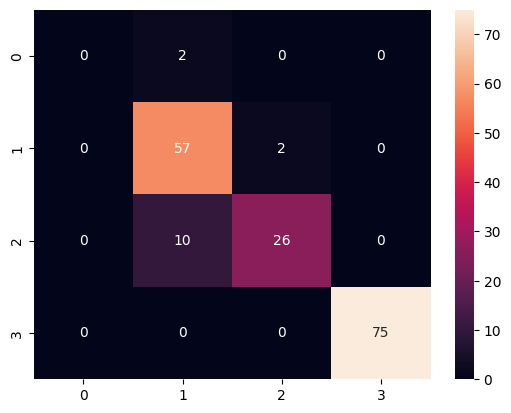

In [212]:
predicted_label  = model_lr_ng.predict(x_train_ng)
actual_label = np.array(y_train_ng['outcome_cd_bin'])
print('accuracy score:',accuracy_score(actual_label,predicted_label))
print('\nclassification report:\n',classification_report(actual_label,predicted_label, labels=[0,1,2,3]))
print('\nconfusion matrix:\n',confusion_matrix(actual_label,predicted_label))
print('\nprecison,recall,fscore,support ARRAYS:\n',precision_recall_fscore_support(actual_label,predicted_label))

print('\nsensitivity score:\n',recall_score(actual_label,predicted_label, average='micro'))
cm = confusion_matrix(actual_label,predicted_label)
sns.heatmap(cm,annot=True)

    91.9% accuracy on train set data

In [213]:
print('Accuracy on test dataset: ', accuracy_score(y_test_ng['outcome_cd_bin'], model_lr_ng.predict(x_test_ng)))

Accuracy on test dataset:  0.9324324324324325


    93% accuracy on test set

accuracy score: 0.9324324324324325

classification report:
               precision    recall  f1-score   support

           1       0.83      1.00      0.91        25
           2       1.00      0.67      0.80        15
           3       1.00      1.00      1.00        34

    accuracy                           0.93        74
   macro avg       0.94      0.89      0.90        74
weighted avg       0.94      0.93      0.93        74


confusion matrix:
 [[25  0  0]
 [ 5 10  0]
 [ 0  0 34]]

precison,recall,fscore,support ARRAYS:
 (array([0.83333333, 1.        , 1.        ]), array([1.        , 0.66666667, 1.        ]), array([0.90909091, 0.8       , 1.        ]), array([25, 15, 34], dtype=int64))

sensitivity score:
 0.9324324324324325


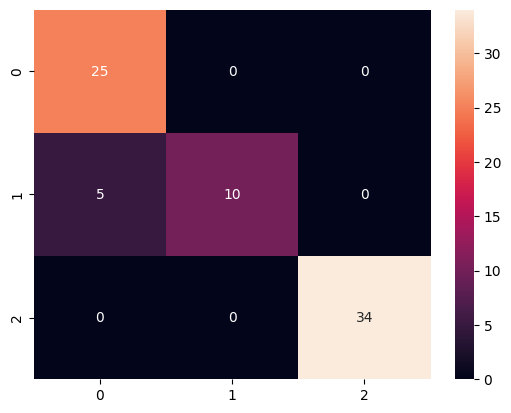

In [214]:
predicted_label2  = model_lr_ng.predict(x_test_ng_lr)
actual_label2 = np.array(y_test_ng['outcome_cd_bin'])
print('accuracy score:',accuracy_score(actual_label2,predicted_label2))
print('\nclassification report:\n',classification_report(actual_label2,predicted_label2))
print('\nconfusion matrix:\n',confusion_matrix(actual_label2,predicted_label2))
print('\nprecison,recall,fscore,support ARRAYS:\n',precision_recall_fscore_support(actual_label2,predicted_label2))

print('\nsensitivity score:\n',recall_score(actual_label2,predicted_label2,average='micro'))
cm = confusion_matrix(actual_label2,predicted_label2)

sns.heatmap(cm,annot=True)
plt.show()

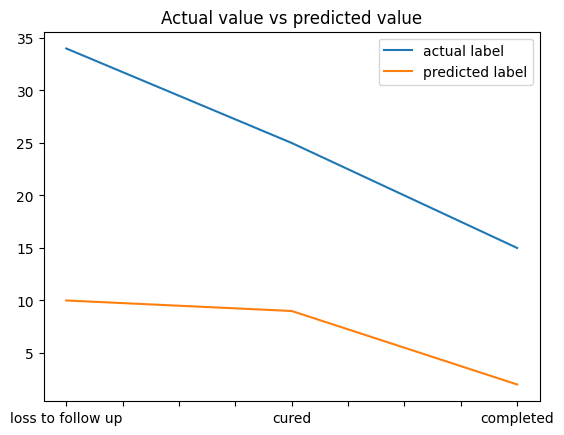

In [215]:
y_pred_ng_lr = model_lr_ng.predict(x_test_ng_lr)


y_pred_ng_lr = pd.DataFrame(y_pred_ng_lr, columns=['outcome_cd_bin'])

y_pred_ng_lr['state'] = y_pred_ng_lr['outcome_cd_bin'].apply(lambda x:'cured' \
if x == 1 else ('failed' if x == 0\
                     else('completed' if x == 2 else 'loss to follow up')))

x_test_ng_lr['actual_label'] = y_test_ng['state']
x_test_ng_lr['predicted_label'] = y_pred_ng_lr['state']

x_test_ng_lr['actual_label'].value_counts().plot(label='actual label')
x_test_ng_lr['predicted_label'].value_counts().plot(label='predicted label', title = 'Actual value vs predicted value')

plt.legend()
plt.savefig('lr_comparison.jpg')

### Random Forest

### Using GridSearchCV

In [228]:
rf_ng = RandomForestClassifier()
# model_rf_ng = rf_ng.fit(x_train_ng, y_train_ng['outcome_cd_bin'])
# model_rf_ng

In [229]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
cv_rfc = GridSearchCV(estimator=rf_ng, param_grid=param_grid, cv= 5, scoring='accuracy')
cv_rfc.fit(x_train_ng, y_train_ng['outcome_cd_bin'])

c:\Users\oyeni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\oyeni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\oyeni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\o

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             scoring='accuracy')

In [230]:
df = pd.DataFrame(cv_rfc.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.365806,0.076137,0.020568,0.004576,gini,4,auto,200,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.914286,0.857143,0.852941,0.941176,0.970588,0.907227,0.046200,35
1,0.924187,0.188284,0.049198,0.011575,gini,4,auto,500,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.914286,0.885714,0.852941,0.941176,0.970588,0.912941,0.041143,1
2,0.262667,0.033722,0.015844,0.000978,gini,4,sqrt,200,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.914286,0.885714,0.852941,0.941176,0.970588,0.912941,0.041143,1
3,0.656974,0.113925,0.049990,0.017270,gini,4,sqrt,500,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.914286,0.885714,0.852941,0.941176,0.970588,0.912941,0.041143,1
4,0.293530,0.052167,0.018713,0.002615,gini,4,log2,200,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.885714,0.857143,0.852941,0.941176,0.970588,0.901513,0.046738,55


    The DataFrame showing different combinations of the parameters used

In [231]:
df5 = pd.DataFrame({'param': cv_rfc.cv_results_["params"], 'acc': cv_rfc.cv_results_["mean_test_score"]})
df5.to_csv('RandomForest_NG_search.csv')
df5.head()

,param,acc
0,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.907227
1,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.912941
2,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.912941
3,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.912941
4,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.901513


    The best parameter combination
    and the best score

In [ ]:
print(cv_rfc.best_params_)
print(cv_rfc.best_score_)

{'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 500}
0.9129411764705881


#### using the best_param to build a model

In [ ]:
rf_ng=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=4, criterion='gini')
model_rf_ng = rf_ng.fit(x_train_ng, y_train_ng['outcome_cd_bin'])

c:\Users\oyeni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


accuracy score: 0.9186046511627907

classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.83      0.97      0.89        59
           2       0.93      0.72      0.81        36
           3       1.00      1.00      1.00        75

    accuracy                           0.92       172
   macro avg       0.69      0.67      0.68       172
weighted avg       0.91      0.92      0.91       172


confusion matrix:
 [[ 0  2  0  0]
 [ 0 57  2  0]
 [ 0 10 26  0]
 [ 0  0  0 75]]

precison,recall,fscore,support ARRAYS:
 (array([0.        , 0.82608696, 0.92857143, 1.        ]), array([0.        , 0.96610169, 0.72222222, 1.        ]), array([0.      , 0.890625, 0.8125  , 1.      ]), array([ 2, 59, 36, 75], dtype=int64))

sensitivity score:
 0.9186046511627907


c:\Users\oyeni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\oyeni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\oyeni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

<AxesSubplot: >

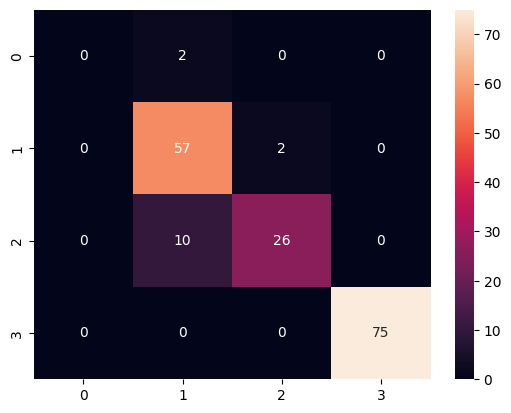

In [ ]:
predicted_label  = model_rf_ng.predict(x_train_ng)
actual_label = np.array(y_train_ng['outcome_cd_bin'])
print('accuracy score:',accuracy_score(actual_label,predicted_label))
print('\nclassification report:\n',classification_report(actual_label,predicted_label, labels=[0,1,2,3]))
print('\nconfusion matrix:\n',confusion_matrix(actual_label,predicted_label))
print('\nprecison,recall,fscore,support ARRAYS:\n',precision_recall_fscore_support(actual_label,predicted_label))

print('\nsensitivity score:\n',recall_score(actual_label,predicted_label, average='micro'))

cm = confusion_matrix(actual_label,predicted_label)
sns.heatmap(cm,annot=True)

    91.9% on train set

In [ ]:
print('Accuracy on test dataset: ', accuracy_score(y_test_ng['outcome_cd_bin'], model_rf_ng.predict(x_test_ng)))

Accuracy on test dataset:  0.9324324324324325


    93.24% accuracy on test set data

accuracy score: 0.9324324324324325

classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.83      1.00      0.91        25
           2       1.00      0.67      0.80        15
           3       1.00      1.00      1.00        34

   micro avg       0.93      0.93      0.93        74
   macro avg       0.71      0.67      0.68        74
weighted avg       0.94      0.93      0.93        74


confusion matrix:
 [[25  0  0]
 [ 5 10  0]
 [ 0  0 34]]

precison,recall,fscore,support ARRAYS:
 (array([0.83333333, 1.        , 1.        ]), array([1.        , 0.66666667, 1.        ]), array([0.90909091, 0.8       , 1.        ]), array([25, 15, 34], dtype=int64))

sensitivity score:
 0.9324324324324325


c:\Users\oyeni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\oyeni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\oyeni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

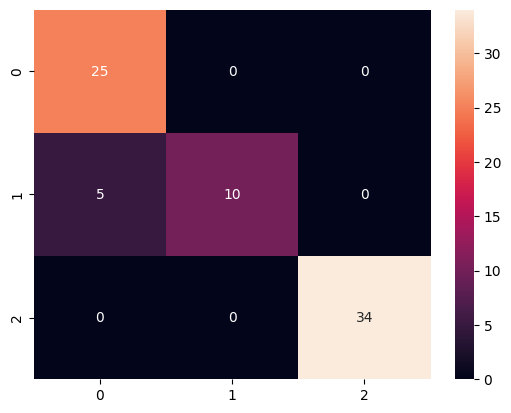

In [ ]:
predicted_label3  = model_rf_ng.predict(x_test_ng)
actual_label3 = np.array(y_test_ng['outcome_cd_bin'])
print('accuracy score:',accuracy_score(actual_label3,predicted_label3))
print('\nclassification report:\n',classification_report(actual_label3,predicted_label3, labels=[0,1,2,3]))
print('\nconfusion matrix:\n',confusion_matrix(actual_label3,predicted_label3))
print('\nprecison,recall,fscore,support ARRAYS:\n',precision_recall_fscore_support(actual_label3,predicted_label3))
# def specificity(y_true , y_pred):
#     w,x,y,z = precision_recall_fscore_support(actual_label3,predicted_label3)
#     return(x[0])
print('\nsensitivity score:\n',recall_score(actual_label3,predicted_label3,average='micro'))
# print('\nspecificity score:\n',specificity(actual_label3,predicted_label3))

cm = confusion_matrix(actual_label3,predicted_label3)

sns.heatmap(cm,annot=True)
plt.show()

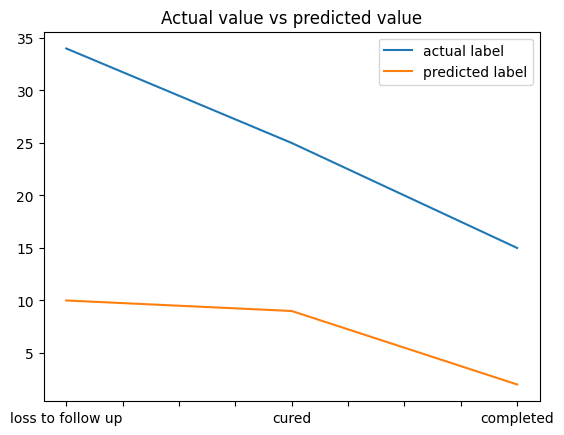

In [ ]:
y_pred_ng_rf = model_rf_ng.predict(x_test_ng_rf)


y_pred_ng_rf = pd.DataFrame(y_pred_ng_rf, columns=['outcome_cd_bin'])

y_pred_ng_rf['state'] = y_pred_ng_rf['outcome_cd_bin'].apply(lambda x:'cured' \
if x == 1 else ('failed' if x == 0\
                     else('completed' if x == 2 else 'loss to follow up')))

x_test_ng_rf['actual_label'] = y_test_ng['state']
x_test_ng_rf['predicted_label'] = y_pred_ng_rf['state']

x_test_ng_rf['actual_label'].value_counts().plot(label='actual label')
x_test_ng_rf['predicted_label'].value_counts().plot(label='predicted label', title = 'Actual value vs predicted value')

plt.legend()
plt.savefig('rf_comparison.jpg')

 
    From the graphs above it can be clearly shown that the model performs well on the smaller dataset giving accuracies higher than 90% for both algorithms.
    


#### Stratified K-fold validation with 10 splits to evaluate the models' performance

c:\Users\oyeni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\oyeni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\oyeni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicit

scores:  [0.875      0.875      1.         1.         0.85714286 1.
 1.         0.85714286 1.         0.85714286]
Average/ Mean score:  0.9321428571428573


<AxesSubplot: title={'center': 'K-fold scores'}>

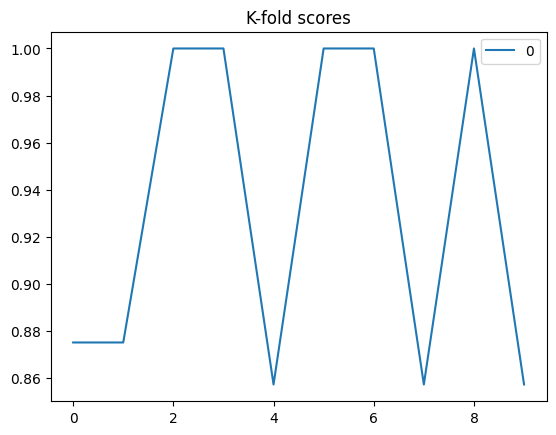

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
skfold=StratifiedKFold(n_splits=10)
scores=cross_val_score(model_rf_ng,x_test_ng,y_test_ng['outcome_cd_bin'],cv=skfold)
print('scores: ',scores)
print('Average/ Mean score: ', np.mean(scores))
pd.DataFrame(scores).plot(title='K-fold scores')

    As shown above, the average mean score gottne from the K-Fold 
    is approximately equal to the accuracy gotten from the metrics above.

### Plotting the learning curve for the two models

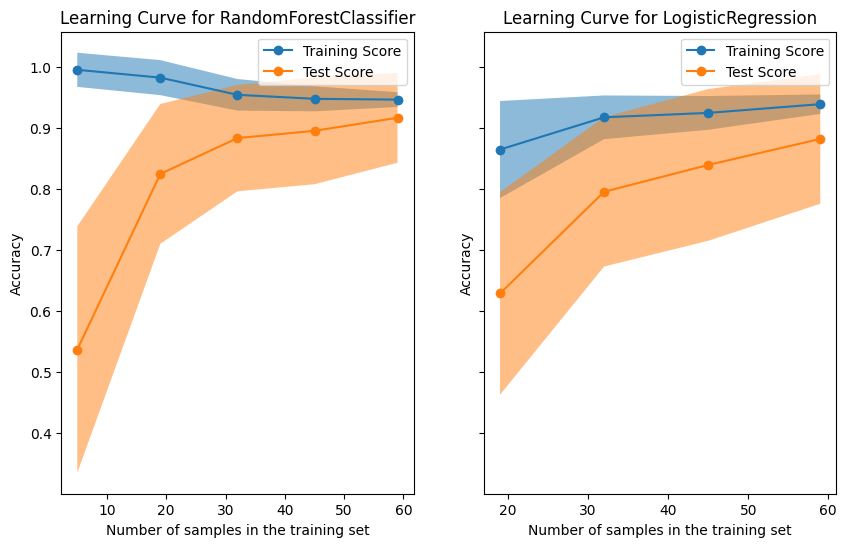

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": x_test_ng,
    "y": y_test_ng['outcome_cd_bin'],
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([model_rf_ng, model_lr_ng]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")
plt.savefig('learning_curve.png')

### LOSS CURVE for NIGERIA DATA

In [ ]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

def NeuralClass(X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
    X_tr,X_val,y_tr,y_val=train_test_split(X_train,y_train,test_size=0.2)
    mlp=MLPClassifier(activation="relu",max_iter=3000)
    mlp.fit(X_train,y_train)
    print (mlp.score(X_train,y_train))
    plt.plot(mlp.loss_curve_, label='train loss curve')
    mlp.fit(X_val,y_val)
    plt.plot(mlp.loss_curve_, label='test loss curve')
    plt.title('Train Test Loss curve')
    plt.legend()
    plt.savefig('loss_curve.png')

c:\Users\oyeni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0


c:\Users\oyeni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


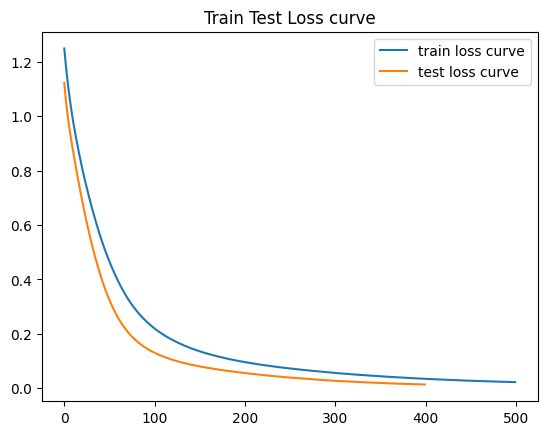

In [ ]:
NeuralClass(training_features_ng, outcome_label_ng)